# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
df = pd.read_parquet('/content/2023-1.parquet')
df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/taxifile')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file

        temp_df = pd.read_parquet(file_path)

        temp_df['tpep_picup_datetime'] = pd.to_datetime(temp_df['tpep_pickup_datetime'])
        temp_df['date'] = temp_df['tpep_pickup_datetime'].dt.date
        temp_df['hour'] = temp_df['tpep_pickup_datetime'].dt.hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for current_date in temp_df['date'].unique():
          day_data = temp_df[temp_df['date'] == current_date]

            # Iterate through each hour of the selected date
          for hour in range(24):
            hour_data = day_data[day_data['hour'] == hour]
            if not hour_data.empty:
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        # we initialised this empty DF earlier
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print("Final DataFrame Shape:", df.shape)

Final DataFrame Shape: (1996077, 23)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

df.to_parquet('/content/drive/MyDrive/taxifile/sample_data.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/taxifile/sample_data.parquet')


In [ ]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_picup_datetime,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01 00:07:18,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01 00:16:41,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01 00:14:03,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01 00:24:30,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01 00:43:00,2023-01-01,0,NaN


In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996077 entries, 0 to 1996076
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

df = df.drop(columns=['tpep_picup_datetime', 'store_and_fwd_flag'])
df = df.reset_index(drop=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
df['airport_fee'] = df[['airport_fee', 'Airport_fee']].max(axis=1)
df = df.drop(columns=['Airport_fee'])
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00  

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
negative_fare_records = df[df['fare_amount'] < 0]
print(negative_fare_records)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_records = df[df['fare_amount'] < 0]
print(negative_fare_records[['RatecodeID', 'fare_amount']])


Empty DataFrame
Columns: [RatecodeID, fare_amount]
Index: []


In [ ]:
# Find which columns have negative values
monetary_columns = ['fare_amount', 'tip_amount', 'total_amount', 'tolls_amount', 'extra', 'mta_tax', 'congestion_surcharge']
for col in monetary_columns:
    print(f"Negative values in {col}: {df[df[col] < 0].shape[0]}")


Negative values in fare_amount: 0
Negative values in tip_amount: 0
Negative values in total_amount: 79
Negative values in tolls_amount: 0
Negative values in extra: 3
Negative values in mta_tax: 74
Negative values in congestion_surcharge: 56


In [ ]:
# fix these negative values
df = df[df['fare_amount'] >= 0]
df = df[df['total_amount'] >= 0]
df[monetary_columns] = df[monetary_columns].abs()


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.425605
trip_distance            0.000000
RatecodeID               3.425605
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.425605
airport_fee              3.425605
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
print(df.isnull().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               68375
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     68375
airport_fee              68375
date                         0
hour                         0
dtype: int64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
print(df.isnull().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     68375
airport_fee              68375
date                         0
hour                         0
dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())
print(df.isnull().sum())


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              68375
date                         0
hour                         0
dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df['airport_fee'] = df['airport_fee'].fillna(df['airport_fee'].median())
print(df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print(df.describe())

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Potential Outliers per Column:\n", outliers)

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.995998e+06                     1995998                     1995998   
mean   1.733076e+00  2023-07-02 20:00:53.617667  2023-07-02 20:18:19.607963   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:11:10.250000         2023-04-02 16:29:55   
50%    2.000000e+00         2023-06-27 15:46:54         2023-06-27 16:03:15   
75%    2.000000e+00         2023-10-06 19:39:21  2023-10-06 19:54:19.250000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.477109e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.995998e+06   1.995998e+06  1.995998e+06  1.995998e+06   
mean      1.356553e+00   3.860569e+00  1.612225e+00  1.652882e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [ ]:
# Continue with outlier handling
# Remove invalid passenger counts (<=0 or >6)
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

# Remove payment_type == 0 (you mentioned it's invalid)
df = df[df['payment_type'] != 0]

# Remove clearly invalid trip_distance
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 250)]

# Drop trips with almost zero distance but huge fare
df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]

# Drop trips where fare and distance are 0 but zones differ
df = df[~((df['fare_amount'] == 0) & (df['trip_distance'] == 0) &
          (df['PULocationID'] != df['DOLocationID']))]

# Drop negative fare
df = df[df['fare_amount'] >= 0]

# Drop negative values in money columns
money_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount',
              'improvement_surcharge', 'total_amount',
              'congestion_surcharge', 'airport_fee']

for col in money_cols:
    df = df[df[col] >= 0]

# Optional: If you're confident, drop RatecodeID or VendorID if not in known values
# df = df[df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])]
# df = df[df['VendorID'].isin([1, 2])]

df.reset_index(drop=True, inplace=True)

# 1. Check for invalid VendorIDs
print("VendorID counts:\n", df['VendorID'].value_counts(dropna=False))

# 2. Check passenger_count distribution
print("Passenger Count counts:\n", df['passenger_count'].value_counts(dropna=False))

# 3. Check for trip_distance near 0 with high fare_amount
print("Trip distance ≈ 0 and fare > 300:\n", df[(df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300)].shape)

# 4. Check for trip_distance and fare_amount both 0 but zones are different
mask = (df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])
print("Zero fare + zero distance + different zones:", df[mask].shape)

# 5. Check for trip_distance > 250
print("Trip distance > 250 miles:", df[df['trip_distance'] > 250].shape)

# 6. Check for invalid RatecodeIDs
print("RatecodeID counts:\n", df['RatecodeID'].value_counts(dropna=False))

# 7. Check for invalid payment_type (e.g., 0)
print("Payment Type counts:\n", df['payment_type'].value_counts(dropna=False))

# 8. Check for negative fare_amount
print("Negative fare_amount:", df[df['fare_amount'] < 0].shape)

# 9. Check for negative values in monetary columns
money_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount',
              'improvement_surcharge', 'total_amount',
              'congestion_surcharge', 'airport_fee']

for col in money_cols:
    print(f"Negative values in {col}:", df[df[col] < 0].shape)


VendorID counts:
 VendorID
2    1404332
1     468818
Name: count, dtype: int64
Passenger Count counts:
 passenger_count
1.0    1430936
2.0     289154
3.0      71803
4.0      39683
5.0      24977
6.0      16597
Name: count, dtype: int64
Trip distance ≈ 0 and fare > 300:
 (0, 20)
Zero fare + zero distance + different zones: (0, 20)
Trip distance > 250 miles: (0, 20)
RatecodeID counts:
 RatecodeID
1.0     1775488
2.0       72869
99.0       9804
3.0        6054
5.0        5083
4.0        3851
6.0           1
Name: count, dtype: int64
Payment Type counts:
 payment_type
1    1532991
2     320763
4      12830
3       6566
Name: count, dtype: int64
Negative fare_amount: (0, 20)
Negative values in extra: (0, 20)
Negative values in mta_tax: (0, 20)
Negative values in tip_amount: (0, 20)
Negative values in tolls_amount: (0, 20)
Negative values in improvement_surcharge: (0, 20)
Negative values in total_amount: (0, 20)
Negative values in congestion_surcharge: (0, 20)
Negative values in airport_fee:

In [ ]:
# Do any columns need standardising?


numerical_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount',
                  'congestion_surcharge', 'airport_fee']

for col in numerical_cols:
    print(f'{col} - Min: {df[col].min()}, Max: {df[col].max()}')

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the new ranges to ensure standardization
for col in numerical_cols:
    print(f'{col} - Mean: {df[col].mean()}, Std Dev: {df[col].std()}')


trip_distance - Min: 0.01, Max: 204.86
fare_amount - Min: 0.0, Max: 143163.45
extra - Min: 0.0, Max: 14.25
mta_tax - Min: 0.0, Max: 4.0
tip_amount - Min: 0.0, Max: 223.08
tolls_amount - Min: 0.0, Max: 95.0
improvement_surcharge - Min: 0.0, Max: 1.0
total_amount - Min: 0.0, Max: 143167.45
congestion_surcharge - Min: 0.0, Max: 2.5
airport_fee - Min: 0.0, Max: 1.75
trip_distance - Mean: -2.262174763889135e-16, Std Dev: 1.0000002669305421
fare_amount - Mean: 5.0238517963893796e-17, Std Dev: 1.0000002669303287
extra - Mean: -4.642397147759875e-16, Std Dev: 1.0000002669336372
mta_tax - Mean: -2.8285757415617993e-15, Std Dev: 1.00000026693287
tip_amount - Mean: 9.999149301783755e-18, Std Dev: 1.0000002669352372
tolls_amount - Mean: 1.9972504136476415e-16, Std Dev: 1.000000266935333
improvement_surcharge - Mean: -9.8758555423923e-14, Std Dev: 1.0000002669170291
total_amount - Mean: -3.472011136541226e-17, Std Dev: 1.000000266929536
congestion_surcharge - Mean: -2.1310781782026227e-16, Std Dev:

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

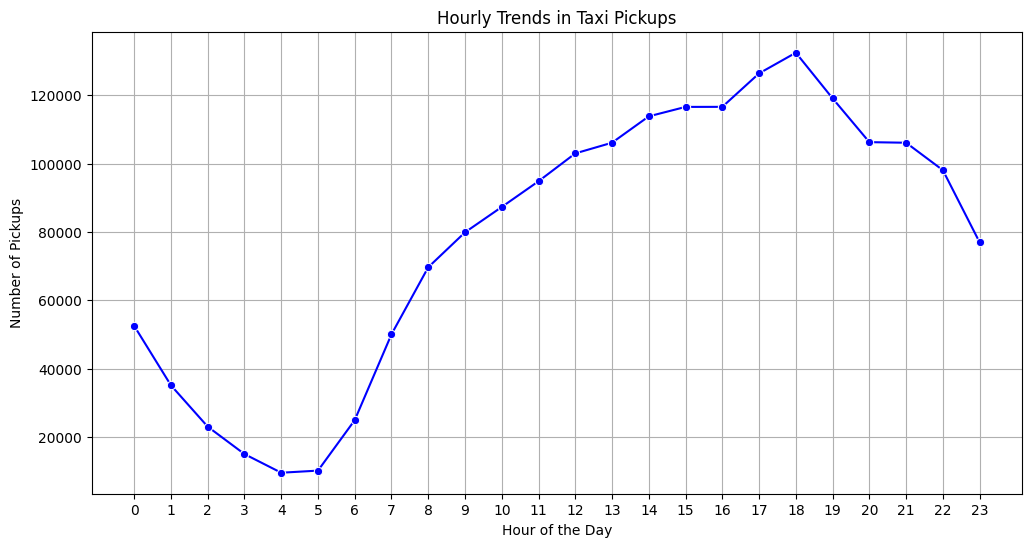

In [ ]:
# Find and show the hourly trends in taxi pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


hourly_trends = df.groupby('pickup_hour').size().reset_index(name='pickup_count')


plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trends, x='pickup_hour', y='pickup_count', marker='o', color='b')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


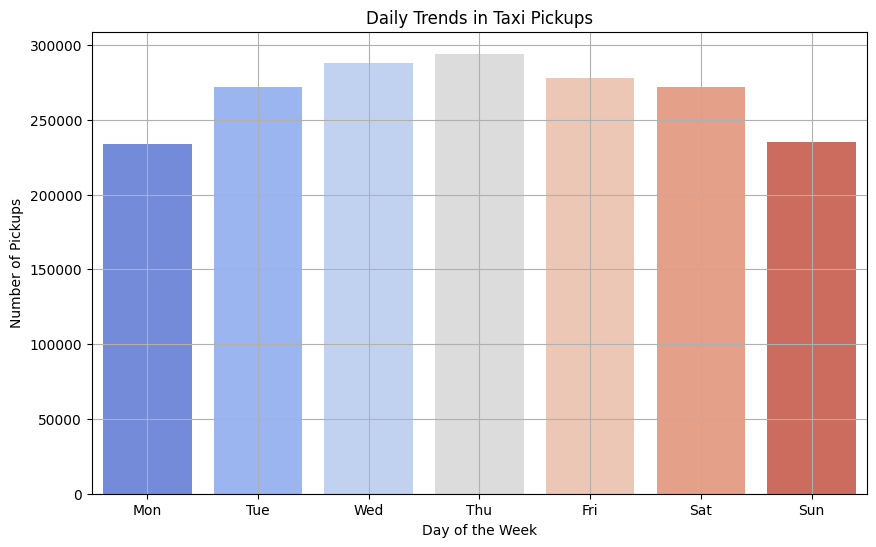

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek


daily_trends = df.groupby('pickup_day_of_week').size().reset_index(name='pickup_count')


plt.figure(figsize=(10, 6))
sns.barplot(data=daily_trends, x='pickup_day_of_week', y='pickup_count', palette='coolwarm')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()


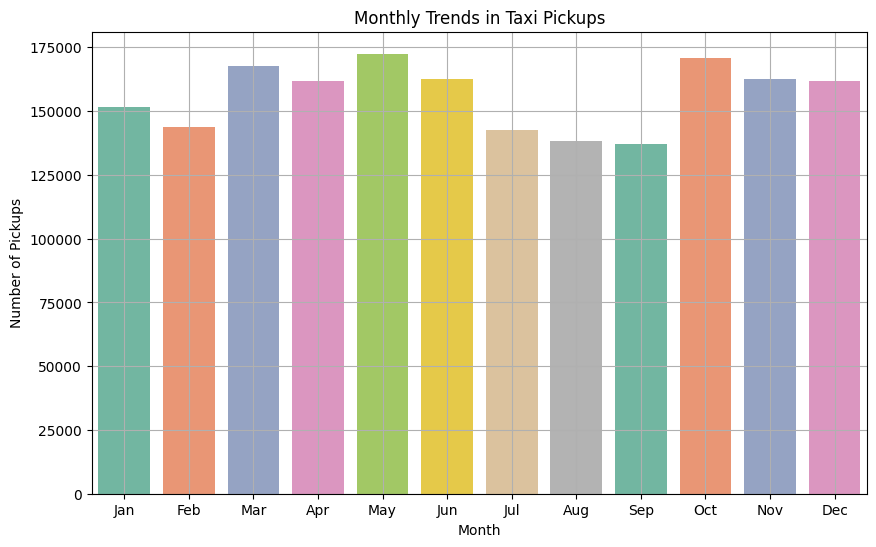

In [ ]:
# Show the monthly trends in pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

monthly_trends = df.groupby('pickup_month').size().reset_index(name='pickup_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_trends, x='pickup_month', y='pickup_count', palette='Set2')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

Negative or Zero values in fare_amount:  (1316701, 23)
Negative or Zero values in tip_amount:  (1199795, 23)
Negative or Zero values in total_amount:  (1348787, 23)
Negative or Zero values in trip_distance:  (1414476, 23)


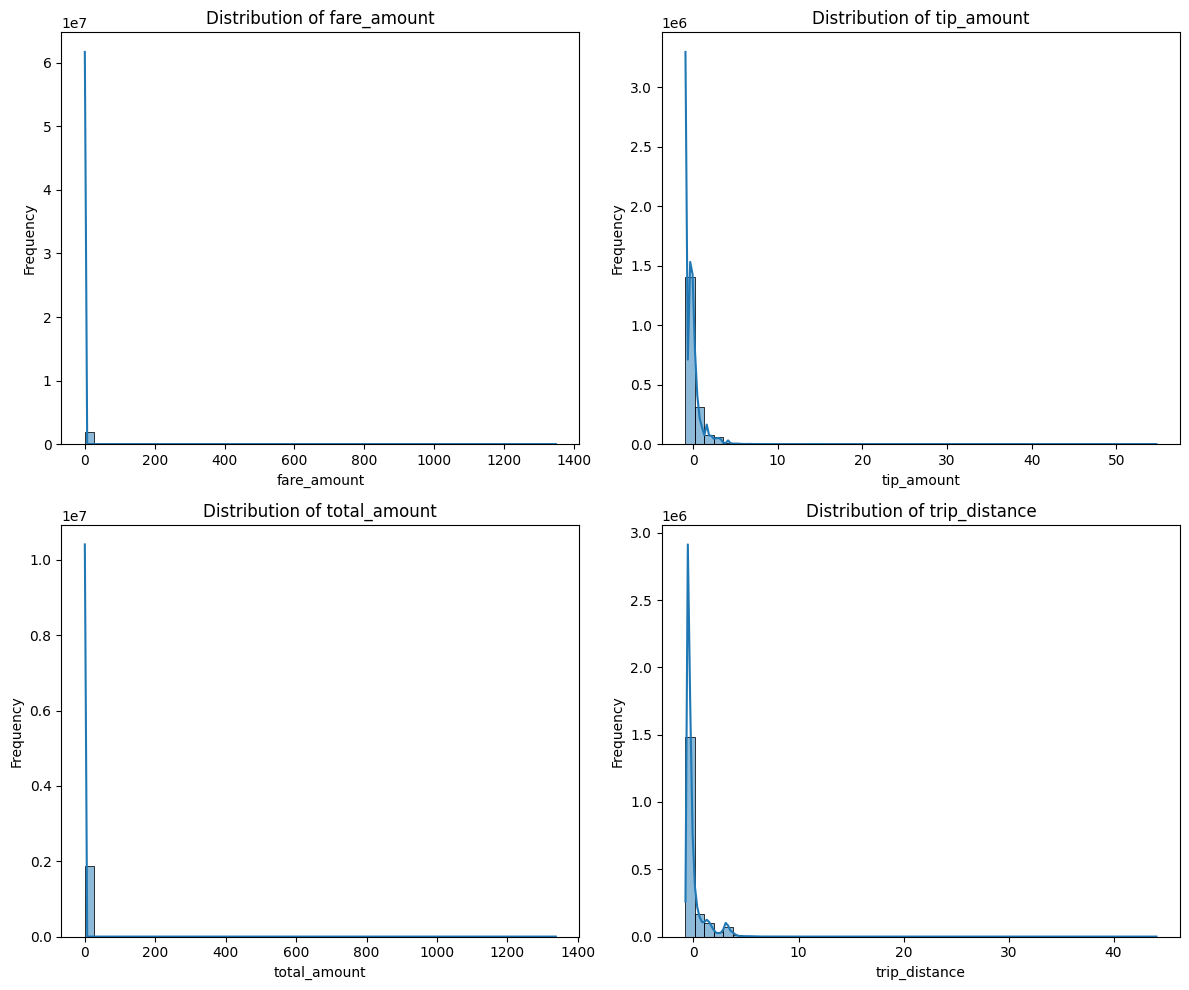

Original DataFrame rows: 1873150
Rows after removing invalid data: 300625


In [ ]:
# Analyse the above parameters
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    print(f"Negative or Zero values in {col}: ", df[df[col] <= 0].shape)

plt.figure(figsize=(12, 10))


for i, col in enumerate(financial_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


cleaned_df = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
]


print(f"Original DataFrame rows: {df.shape[0]}")
print(f"Rows after removing invalid data: {cleaned_df.shape[0]}")


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

df_filtered = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
]


df_filtered = df_filtered[~((df_filtered['trip_distance'] == 0) &
                            (df_filtered['PULocationID'] != df_filtered['DOLocationID']))]

print(f"Rows after filtering: {df_filtered.shape[0]}")

df_filtered.head()



Rows after filtering: 300625


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,pickup_hour,pickup_day_of_week,pickup_month
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,0.788524,1.0,246,37,1,0.138995,...,-0.274386,0.022122,0.172754,0.276601,-0.308358,2023-01-01,0,0,6,1
7,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,0.906746,1.0,132,95,1,0.112610,...,-0.274386,0.022122,0.127337,-3.615321,2.373979,2023-01-01,0,0,6,1
12,2,2023-01-01 00:13:02,2023-01-01 00:38:02,1.0,0.190845,1.0,142,148,1,0.053245,...,-0.274386,0.022122,0.099116,0.276601,-0.308358,2023-01-01,0,0,6,1
24,2,2023-01-01 00:24:12,2023-01-01 00:48:09,2.0,0.781956,1.0,144,7,1,0.119206,...,-0.274386,0.022122,0.166680,0.276601,-0.308358,2023-01-01,0,0,6,1
25,2,2023-01-01 00:41:09,2023-01-01 01:00:39,3.0,0.306878,1.0,107,238,1,0.033456,...,-0.274386,0.022122,0.047158,0.276601,-0.308358,2023-01-01,0,0,6,1


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

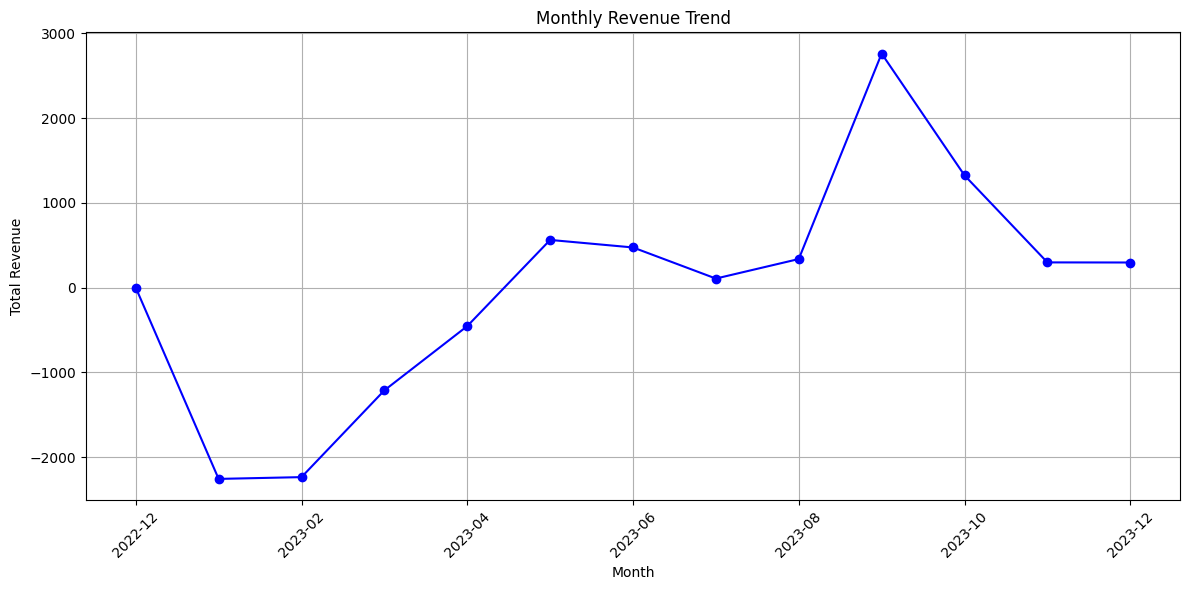

,total_amount
YearMonth,
2022-12,-0.144039
2023-01,-2257.329103
2023-02,-2236.390377
2023-03,-1212.477229
2023-04,-454.369931


In [ ]:
# Group data by month and analyse monthly revenue
import matplotlib.pyplot as plt

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['YearMonth'] = df['tpep_pickup_datetime'].dt.to_period('M')

monthly_revenue = df.groupby('YearMonth')['total_amount'].sum()

monthly_revenue.index = monthly_revenue.index.astype(str)

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='b')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

monthly_revenue.head()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

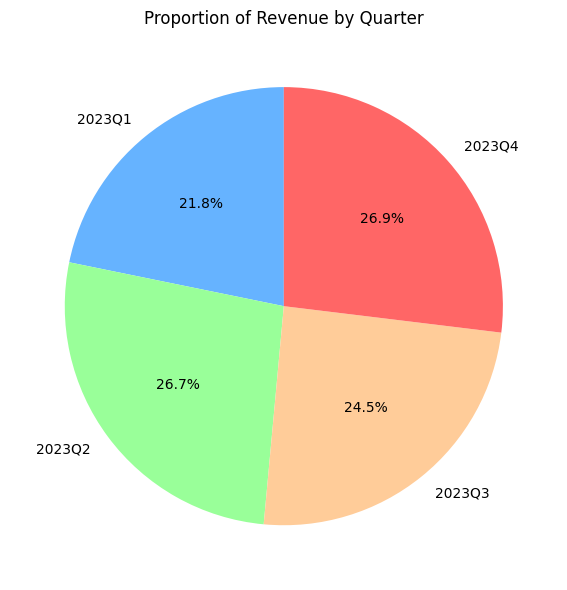

,total_amount
Quarter,
2023Q1,0.217893
2023Q2,0.267446
2023Q3,0.245373
2023Q4,0.269288


In [ ]:
# Calculate proportion of each quarter

df_cleaned = df[df['total_amount'] >= 0]


df_cleaned['Quarter'] = df_cleaned['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = df_cleaned.groupby('Quarter')['total_amount'].sum()

total_revenue = quarterly_revenue.sum()

quarterly_proportion = quarterly_revenue / total_revenue

plt.figure(figsize=(10, 6))
quarterly_proportion.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Proportion of Revenue by Quarter')
plt.ylabel('')
plt.tight_layout()
plt.show()

quarterly_proportion



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

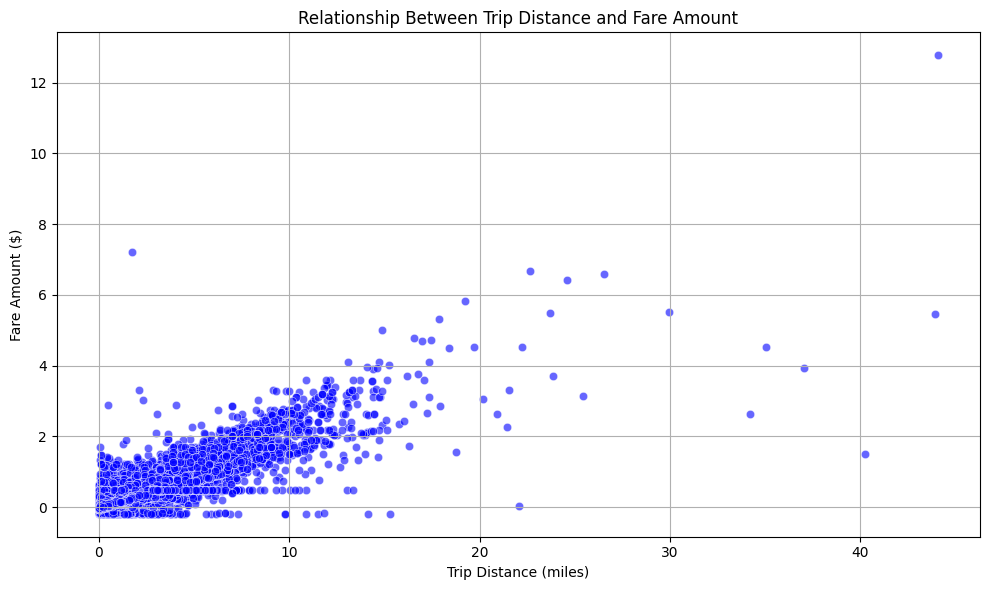

Correlation between trip_distance and fare_amount: 0.9221


In [ ]:
# Show how trip fare is affected by distance
df_filtered = df[df['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered, color='b', alpha=0.6)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df_filtered[['trip_distance', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

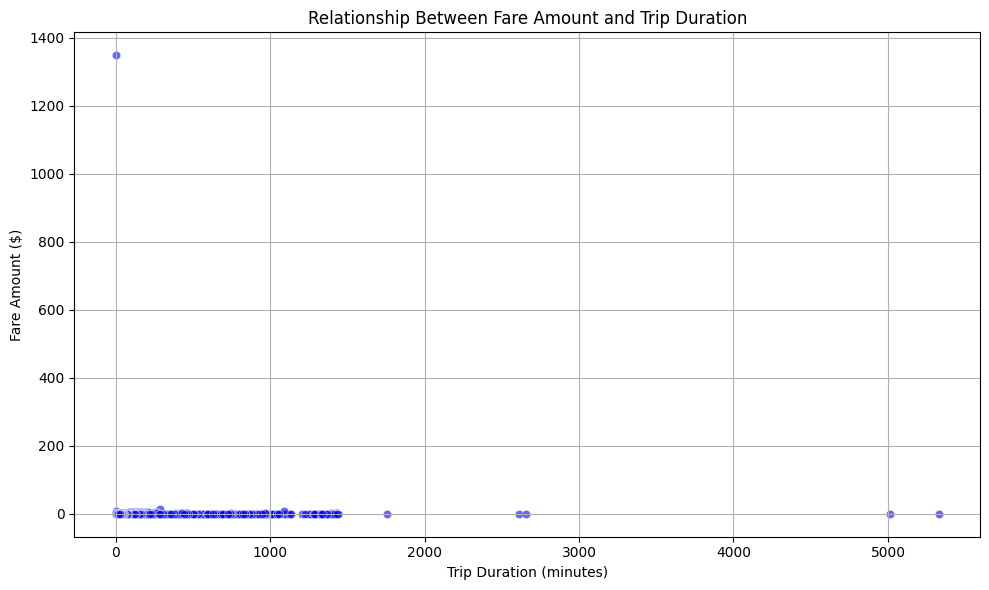

Correlation between fare amount and trip duration: 0.023


In [ ]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

df_filtered = df[df['trip_duration'] > 0]
df_filtered = df_filtered[df_filtered['fare_amount'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_filtered, color='b', alpha=0.6)
plt.title('Relationship Between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df_filtered['fare_amount'].corr(df_filtered['trip_duration'])
print(f"Correlation between fare amount and trip duration: {correlation:.3f}")


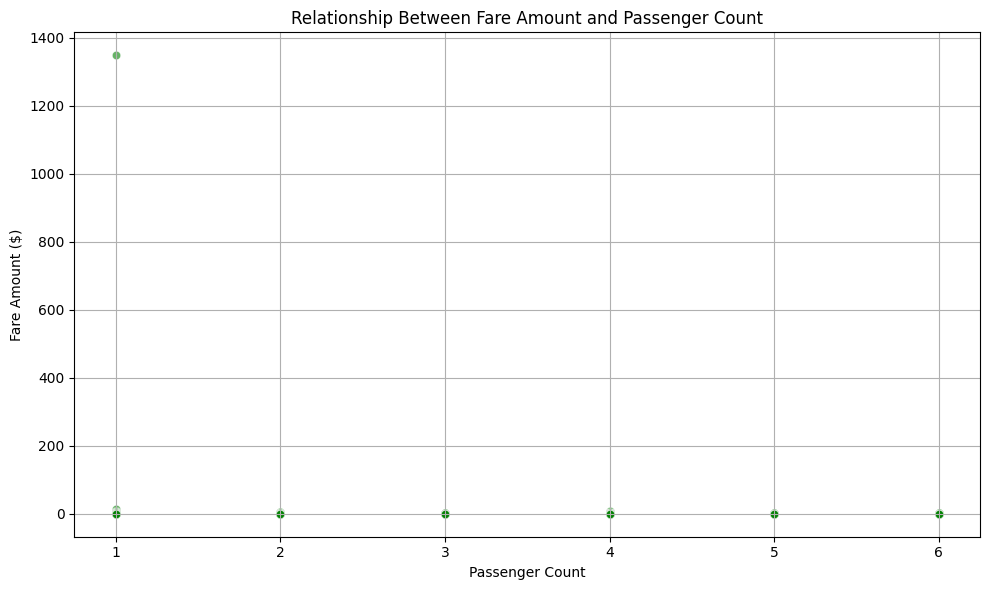

Correlation between fare amount and passenger count: 0.005


In [ ]:
# Show relationship between fare and number of passengers

df_filtered = df[df['fare_amount'] > 0]
df_filtered = df_filtered[df_filtered['passenger_count'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df_filtered, color='g', alpha=0.6)
plt.title('Relationship Between Fare Amount and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df_filtered['fare_amount'].corr(df_filtered['passenger_count'])
print(f"Correlation between fare amount and passenger count: {correlation:.3f}")



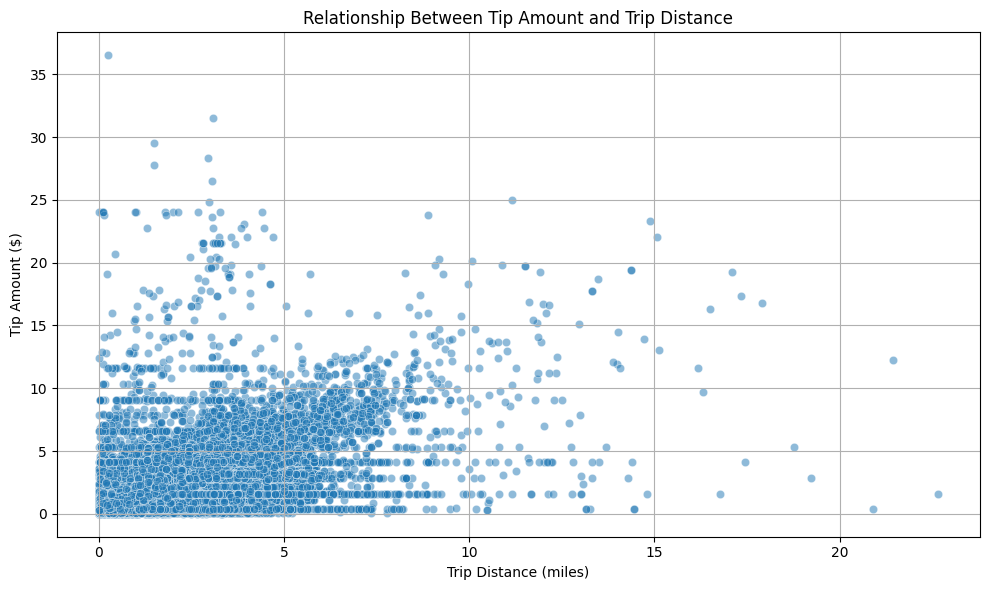

Correlation between tip amount and trip distance: 0.706


In [ ]:
# Show relationship between tip and trip distance

df_tip_dist = df[(df['trip_distance'] > 0) & (df['tip_amount'] > 0)]


plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_tip_dist, alpha=0.5)
plt.title('Relationship Between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


correlation = df_tip_dist['tip_amount'].corr(df_tip_dist['trip_distance'])
print(f"Correlation between tip amount and trip distance: {correlation:.3f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

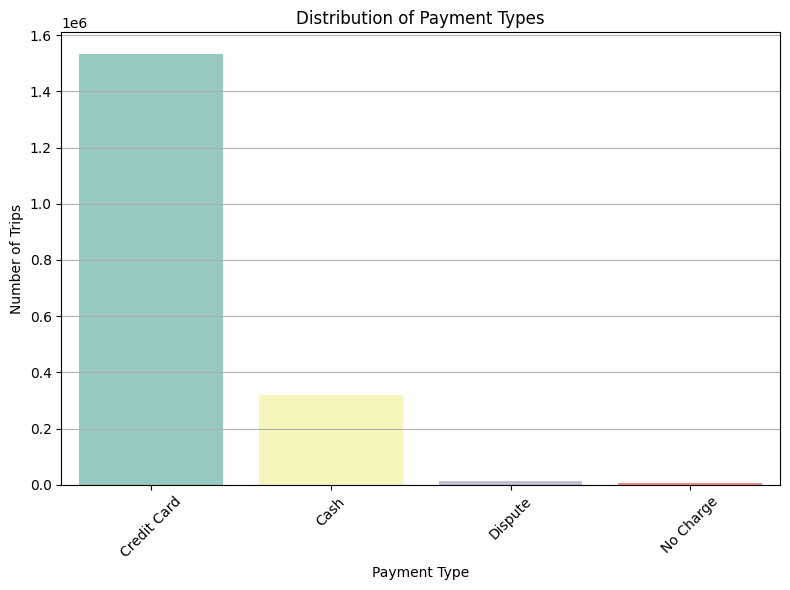

Payment Type Distribution (in %):
 payment_type_label
Credit Card    81.84
Cash           17.12
Dispute         0.68
No Charge       0.35
Name: count, dtype: float64


In [ ]:
# Analyse the distribution of different payment types (payment_type).

payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
}

df['payment_type_label'] = df['payment_type'].map(payment_labels)


payment_counts = df['payment_type_label'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set3')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


payment_percentages = (payment_counts / payment_counts.sum()) * 100
print("Payment Type Distribution (in %):\n", payment_percentages.round(2))


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


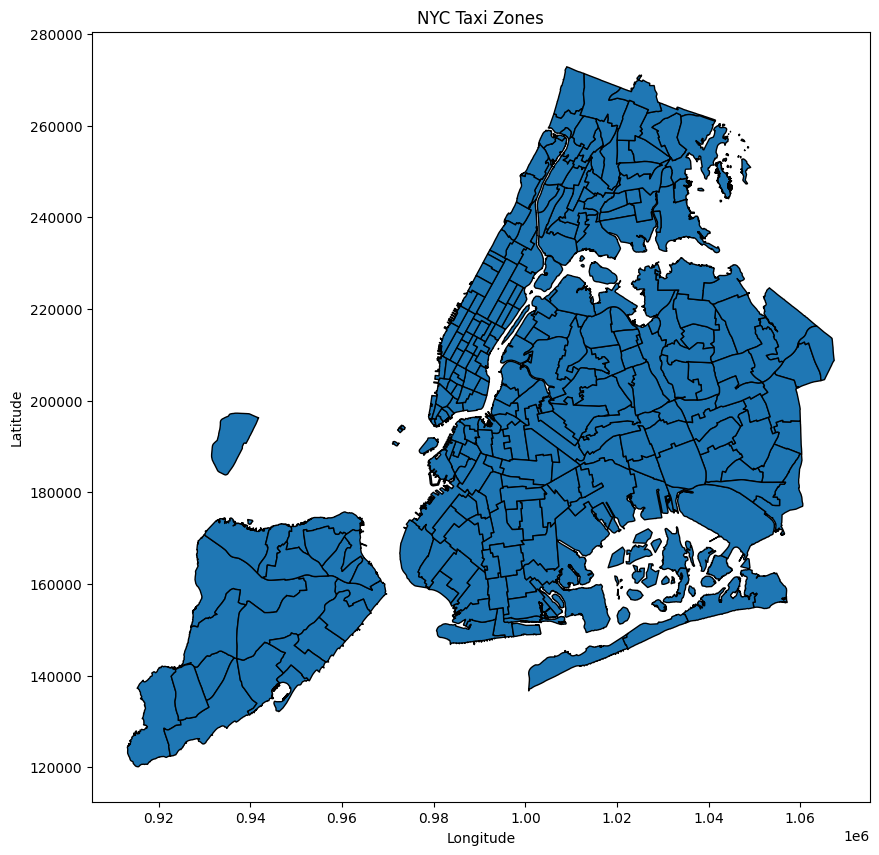

In [ ]:
# import geopandas as gpd


# Read the shapefile using geopandas
# zones = # read the .shp file using gpd
# zones.head()

import geopandas as gpd


shapefile_path = 'Taxi Zones/taxi_zones.shp'

zones = gpd.read_file('/content/drive/MyDrive/taxi_zones/taxi_zones.shp')


print(zones.head())


zones.plot(figsize=(12, 10), edgecolor='black')
plt.title('NYC Taxi Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


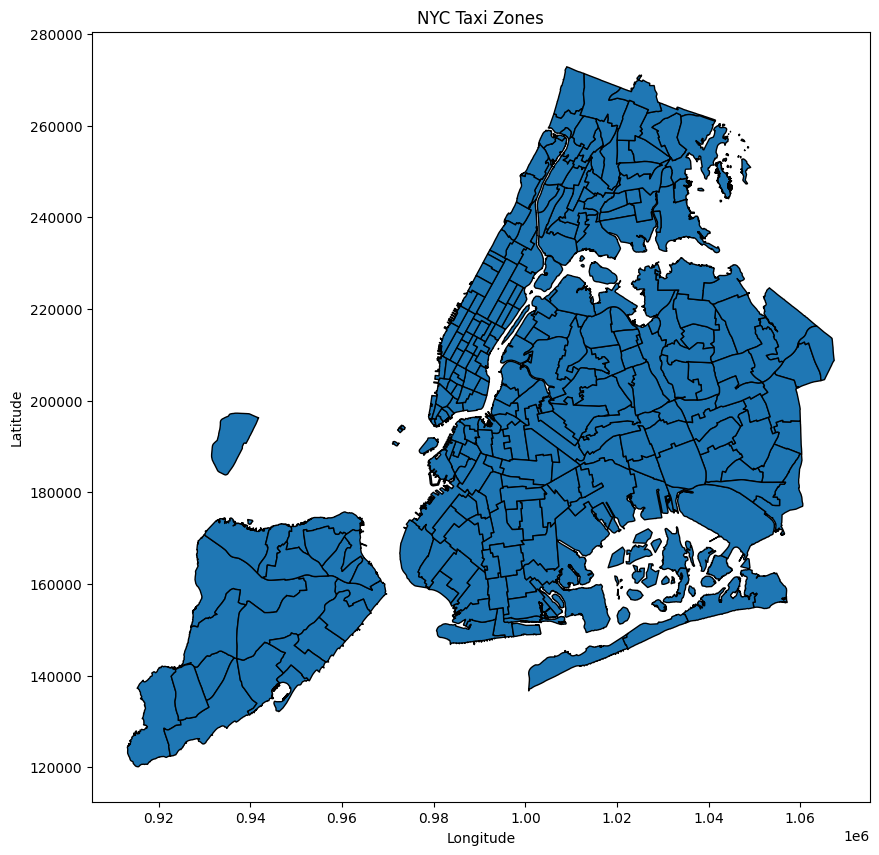

In [ ]:
# print(zones.info())
# zones.plot()

print(zones.info())
zones.plot(figsize=(12, 10), edgecolor='black')
plt.title('NYC Taxi Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
print(zones.columns)

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [ ]:
# Merge zones and trip records using locationID and PULocationID

zones = gpd.read_file("/content/drive/MyDrive/taxi_zones/taxi_zones.shp")

df = df.loc[:, ~df.columns.duplicated()]

columns_to_drop = [col for col in df.columns if 'pickup_zone' in col or 'pickup_borough' in col]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

df = df.merge(
    zones[['LocationID', 'zone', 'borough']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)

df.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)

df.drop(columns=['LocationID'], inplace=True)
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'date', 'hour', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month', 'YearMonth', 'Quarter',
       'trip_duration', 'payment_type_label', 'LocationID_x', 'zone_x',
       'borough_x', 'LocationID_y', 'zone_y', 'borough_y', 'pickup_zone',
       'pickup_borough'],
      dtype='object')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

trip_counts = df.groupby(['PULocationID', 'pickup_zone', 'pickup_borough']).size().reset_index(name='trip_count')


trip_counts = trip_counts.sort_values(by='trip_count', ascending=False)

print(trip_counts.head(10))



    PULocationID              pickup_zone pickup_borough  trip_count
54            56                   Corona         Queens          16
1              2              Jamaica Bay         Queens           1
0              1           Newark Airport            EWR           1
3              4            Alphabet City      Manhattan           1
4              5            Arden Heights  Staten Island           1
5              6  Arrochar/Fort Wadsworth  Staten Island           1
6              7                  Astoria         Queens           1
7              8             Astoria Park         Queens           1
8              9               Auburndale         Queens           1
9             10             Baisley Park         Queens           1


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
trip_counts = df.groupby(['PULocationID']).size().reset_index(name='trip_count')
zones_with_trips = zones.merge(trip_counts, how='left', left_on='LocationID', right_on='PULocationID')
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)
print(zones_with_trips[['LocationID', 'zone', 'borough', 'trip_count']].head())



   LocationID                     zone        borough  trip_count
0           1           Newark Airport            EWR         1.0
1           2              Jamaica Bay         Queens         1.0
2           3  Allerton/Pelham Gardens          Bronx         1.0
3           4            Alphabet City      Manhattan         1.0
4           5            Arden Heights  Staten Island         1.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

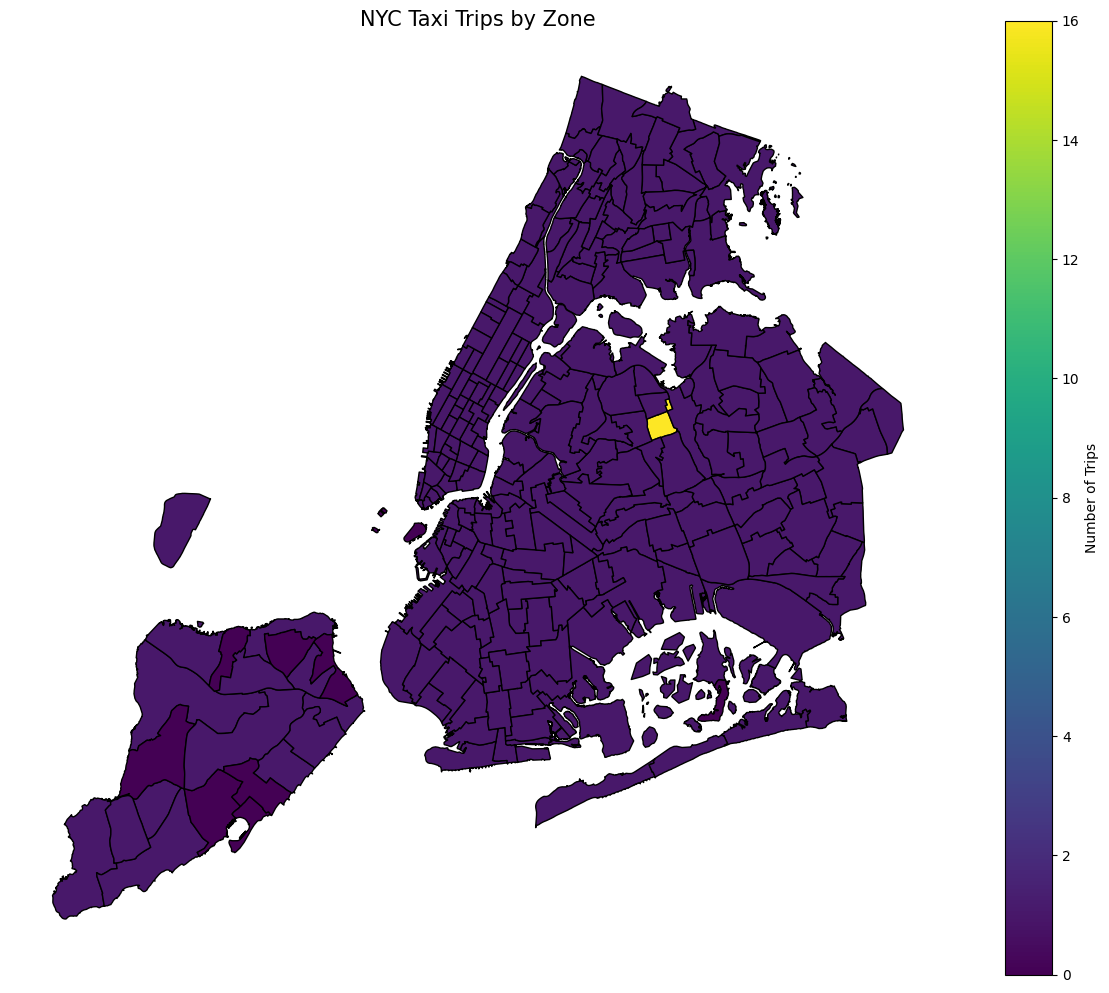

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    cmap='viridis',  # You can try other colormaps like 'OrRd', 'plasma', etc.
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},
    edgecolor='black'
)
ax.set_title("NYC Taxi Trips by Zone", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


     LocationID                       zone        borough  trip_count
55           56                     Corona         Queens        16.0
56           56                     Corona         Queens        16.0
262         263             Yorkville West      Manhattan         1.0
0             1             Newark Airport            EWR         1.0
3             4              Alphabet City      Manhattan         1.0
4             5              Arden Heights  Staten Island         1.0
5             6    Arrochar/Fort Wadsworth  Staten Island         1.0
246         247             West Concourse          Bronx         1.0
245         246  West Chelsea/Hudson Yards      Manhattan         1.0
243         244   Washington Heights South      Manhattan         1.0


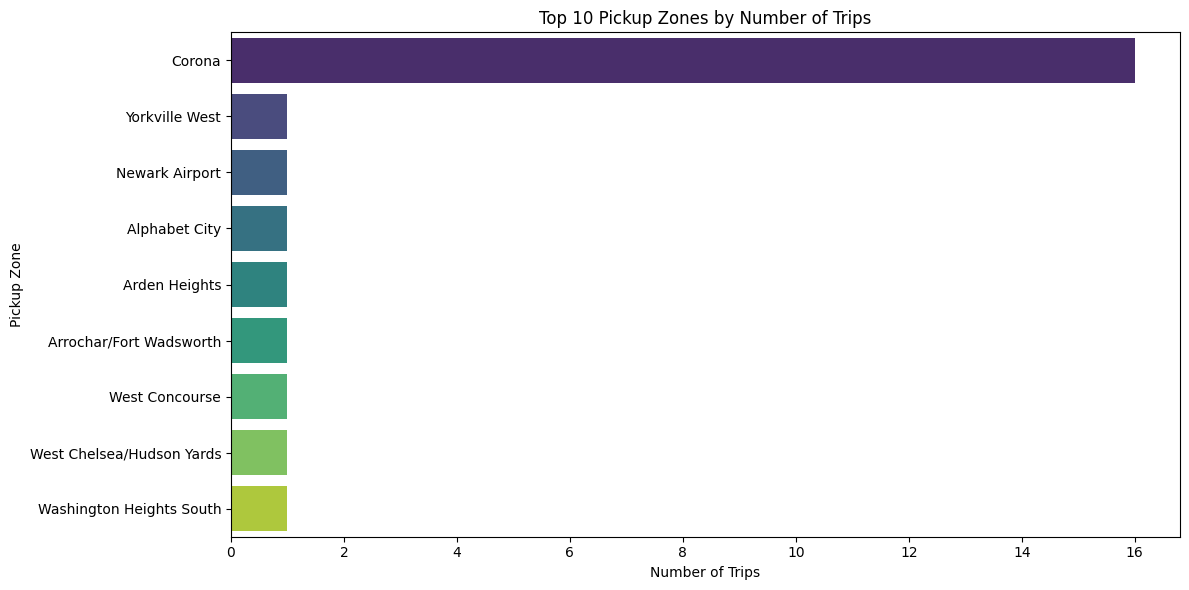

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

top_zones = zones_with_trips.sort_values(by='trip_count', ascending=False)
print(top_zones[['LocationID', 'zone', 'borough', 'trip_count']].head(10))

top_zones = zones_with_trips.sort_values(by='trip_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='trip_count', y='zone', data=top_zones, palette='viridis')
plt.title('Top 10 Pickup Zones by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

df_valid = df[(df['trip_distance'] > 0) & (df['trip_duration'] > 0)]


df_valid['speed'] = df_valid['trip_distance'] / df_valid['trip_duration']

grouped_speed = df_valid.groupby(['PULocationID', 'DOLocationID', 'hour']) \
    .agg(avg_speed=('speed', 'mean'),
         trip_count=('speed', 'count')) \
    .reset_index()

slowest_routes_by_hour = grouped_speed.sort_values(by='avg_speed').groupby('hour').first().reset_index()

slowest_routes_by_hour = slowest_routes_by_hour.merge(
    zones[['LocationID', 'zone']].rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'}),
    on='PULocationID', how='left'
)

slowest_routes_by_hour = slowest_routes_by_hour.merge(
    zones[['LocationID', 'zone']].rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'}),
    on='DOLocationID', how='left'
)

print(slowest_routes_by_hour[['hour', 'pickup_zone', 'dropoff_zone', 'avg_speed', 'trip_count']])



    hour                        pickup_zone                    dropoff_zone  \
0      0                       Clinton East                  Yorkville West   
1      1                          Ridgewood  Long Island City/Hunters Point   
2      2                Morningside Heights                    Bloomingdale   
3      3                          Flatlands                Sunset Park West   
4      4      Westchester Village/Unionport                 Lenox Hill East   
5      5                           Rosedale                   Richmond Hill   
6      6                          Homecrest                    Borough Park   
7      7                     West Concourse                 Lenox Hill East   
8      8                      Melrose South                 Lenox Hill West   
9      9            Bloomfield/Emerson Hill     Heartland Village/Todt Hill   
10    10                            Midwood                  Bushwick South   
11    11                    Jamaica Estates         

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

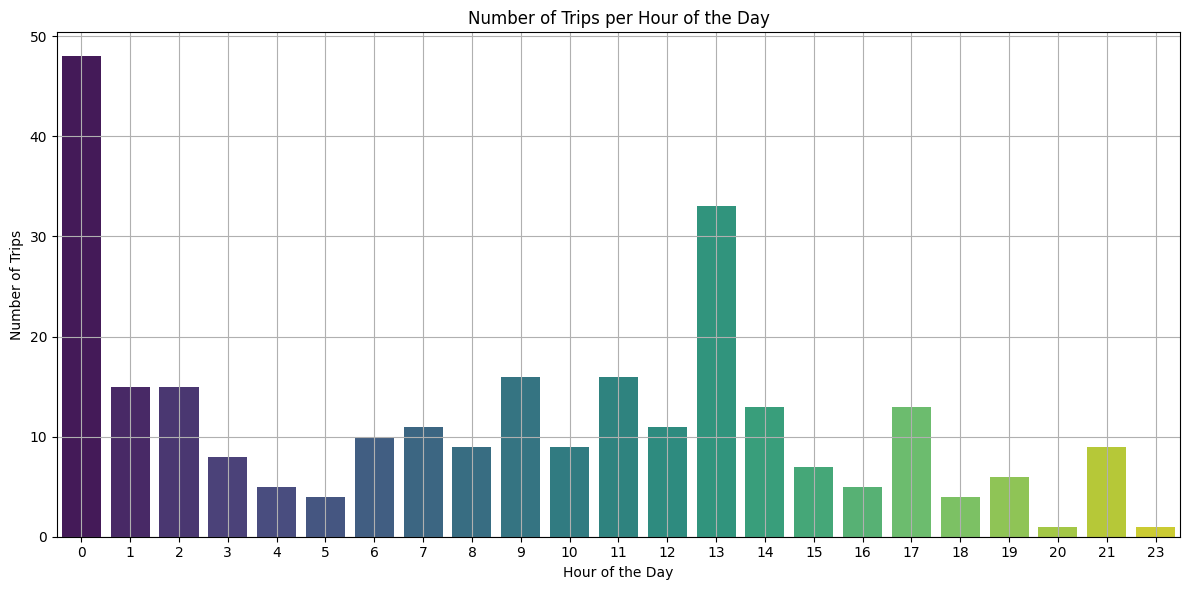

🚕 Busiest Hour: 0:00 with 48 trips


In [ ]:
# Visualise the number of trips per hour and find the busiest hour

trips_per_hour = df['hour'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')
plt.title('Number of Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()

busiest_hour = trips_per_hour.idxmax()
max_trips = trips_per_hour.max()

print(f"🚕 Busiest Hour: {busiest_hour}:00 with {max_trips:,} trips")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.1

trips_per_hour = df['hour'].value_counts().sort_index()

busiest_hours = trips_per_hour.nlargest(5)

scaled_busiest_hours = busiest_hours / sample_fraction
print("Five Busiest Hours (scaled up):")
print(scaled_busiest_hours)




Five Busiest Hours (scaled up):
hour
0     480.0
13    330.0
9     160.0
11    160.0
1     150.0
Name: count, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

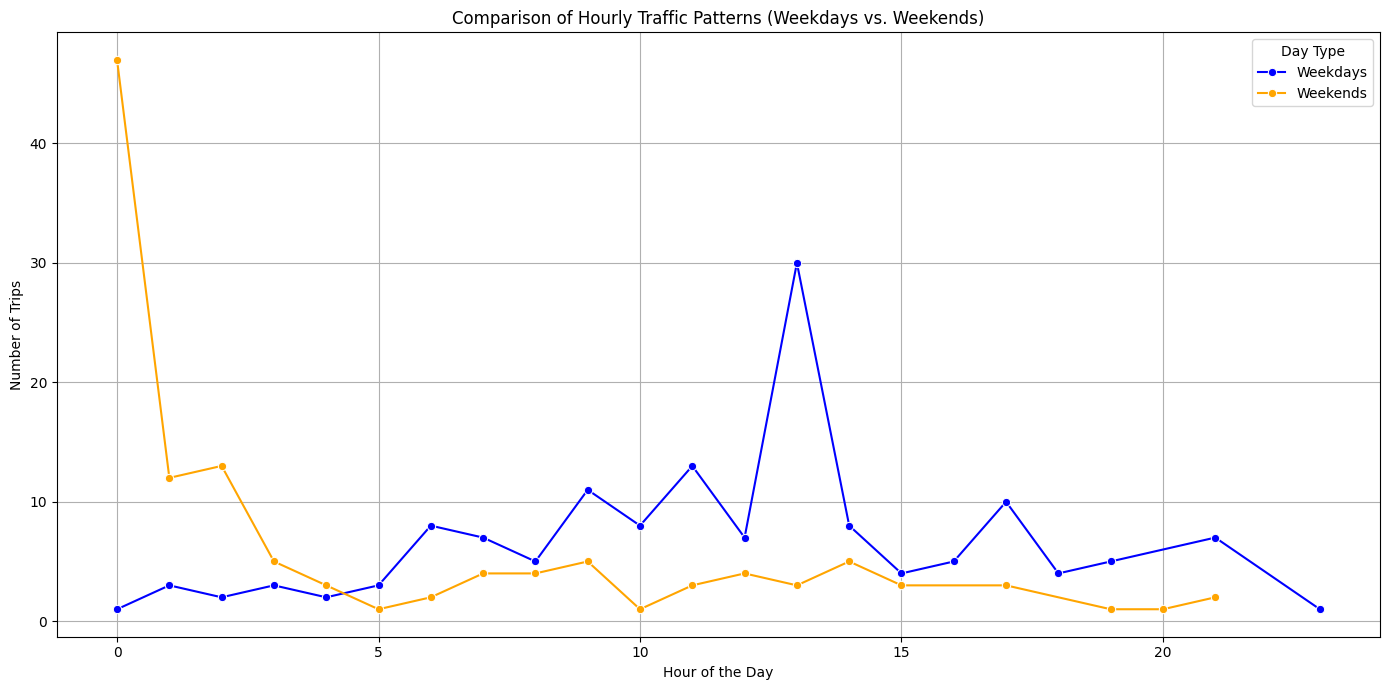

In [ ]:
# Compare traffic trends for the week days and weekends
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

df['is_weekend'] = df['day_of_week'].isin([5, 6])

df['hour'] = df['tpep_pickup_datetime'].dt.hour

weekdays_data = df[df['is_weekend'] == False]
weekends_data = df[df['is_weekend'] == True]

weekdays_hourly = weekdays_data.groupby('hour').size()
weekends_hourly = weekends_data.groupby('hour').size()

plt.figure(figsize=(14, 7))

sns.lineplot(x=weekdays_hourly.index, y=weekdays_hourly.values, label="Weekdays", color="blue", marker="o")

sns.lineplot(x=weekends_hourly.index, y=weekends_hourly.values, label="Weekends", color="orange", marker="o")

plt.title('Comparison of Hourly Traffic Patterns (Weekdays vs. Weekends)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title="Day Type")
plt.grid(True)
plt.tight_layout()

plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones (Hourly):
PULocationID
56    16
1      1
3      1
4      1
5      1
2      1
7      1
8      1
9      1
10     1
Name: pickup_count, dtype: int64

Top 10 Dropoff Zones (Hourly):
DOLocationID
196    17
74      5
236     5
263     5
75      5
138     5
238     5
14      4
140     4
186     4
Name: dropoff_count, dtype: int64


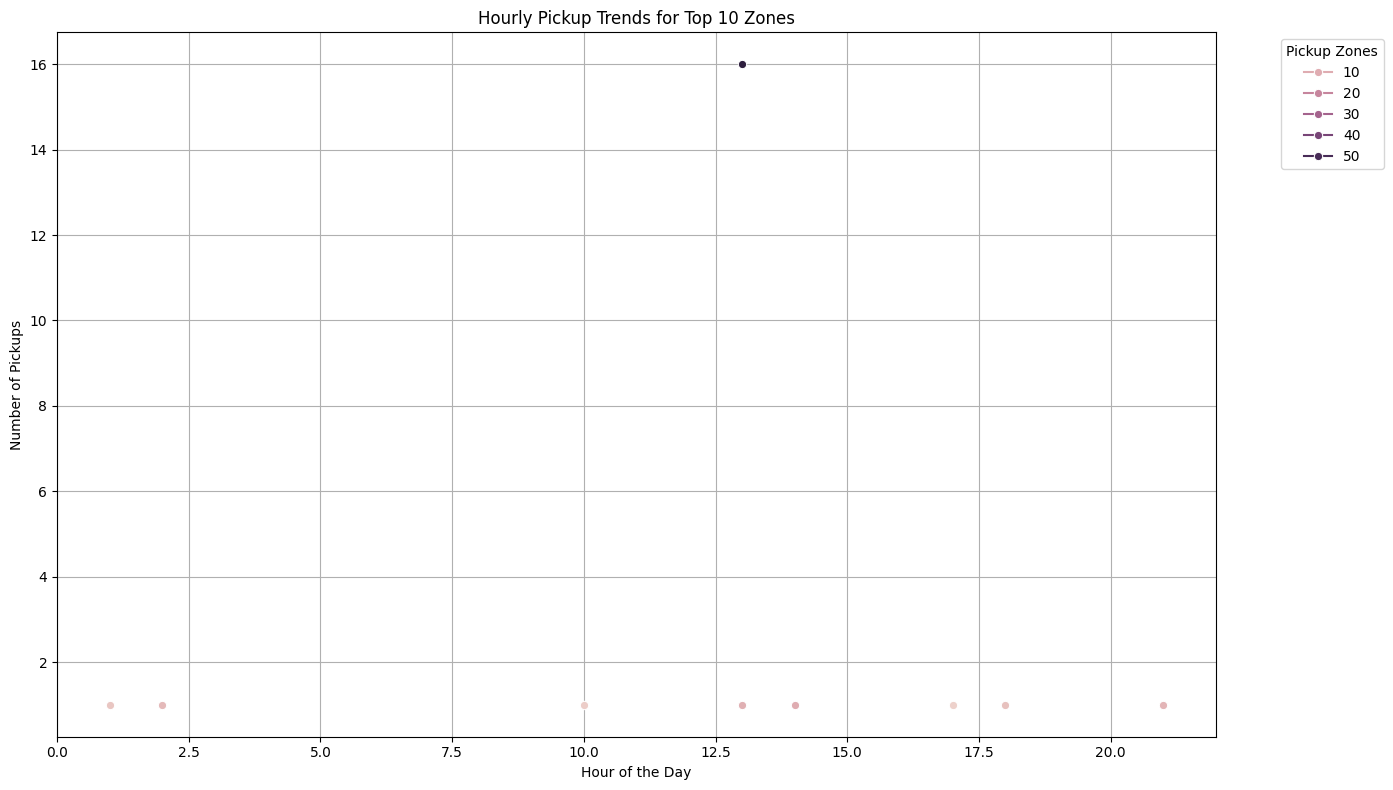

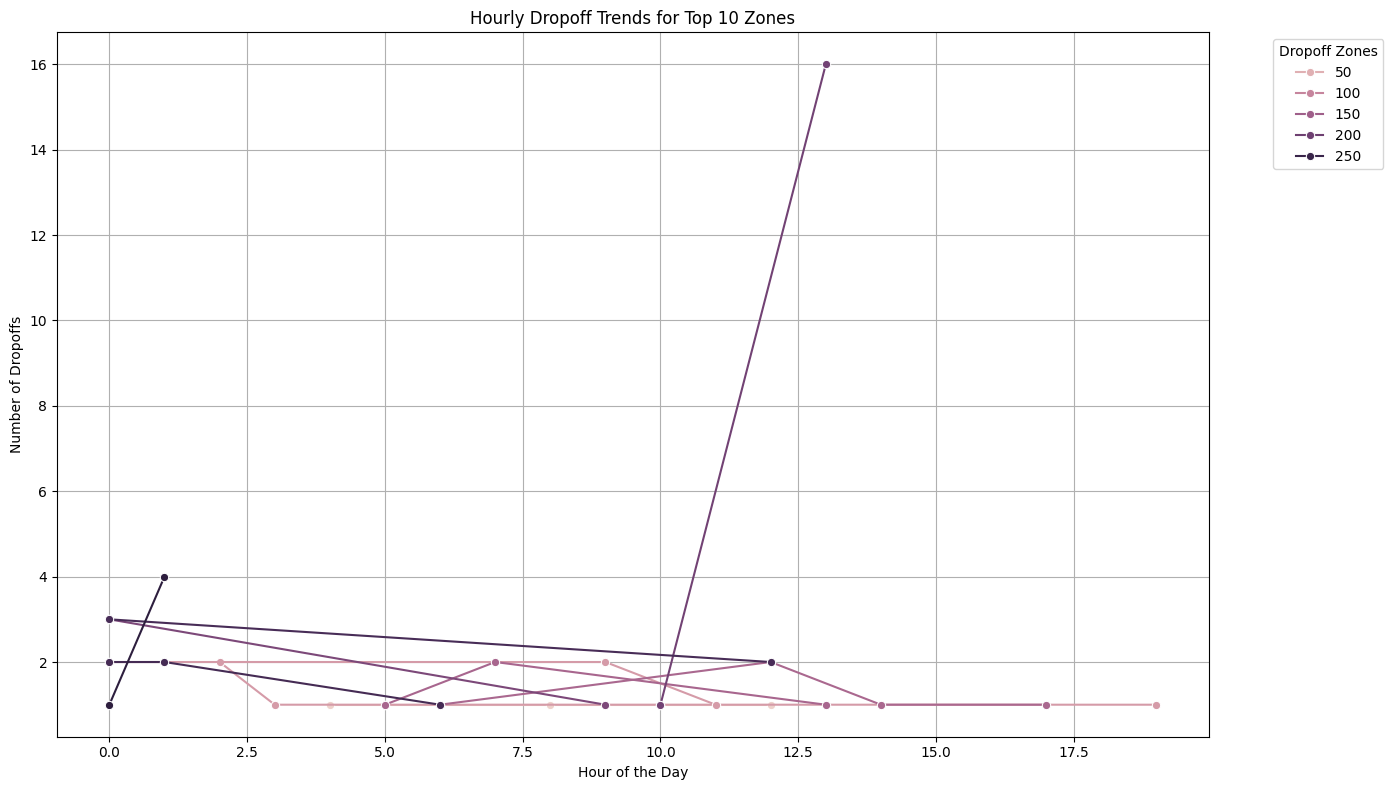

In [ ]:
# Find top 10 pickup and dropoff zones

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

# Group by pickup hour and PULocationID for pickup trends
pickup_hourly = df.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')

# Group by dropoff hour and DOLocationID for dropoff trends
dropoff_hourly = df.groupby(['dropoff_hour', 'DOLocationID']).size().reset_index(name='dropoff_count')

# Find the top 10 pickup zones based on hourly pickups
top_10_pickup_zones = pickup_hourly.groupby('PULocationID')['pickup_count'].sum().sort_values(ascending=False).head(10)

# Find the top 10 dropoff zones based on hourly dropoffs
top_10_dropoff_zones = dropoff_hourly.groupby('DOLocationID')['dropoff_count'].sum().sort_values(ascending=False).head(10)

# Display the top 10 pickup and dropoff zones
print("Top 10 Pickup Zones (Hourly):")
print(top_10_pickup_zones)

print("\nTop 10 Dropoff Zones (Hourly):")
print(top_10_dropoff_zones)

# Visualize hourly pickup and dropoff trends for the top 10 zones

import matplotlib.pyplot as plt
import seaborn as sns

# Plot pickup trends for top 10 zones
plt.figure(figsize=(14, 8))
pickup_top_10 = pickup_hourly[pickup_hourly['PULocationID'].isin(top_10_pickup_zones.index)]
sns.lineplot(data=pickup_top_10, x='pickup_hour', y='pickup_count', hue='PULocationID', marker='o')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.legend(title="Pickup Zones", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot dropoff trends for top 10 zones
plt.figure(figsize=(14, 8))
dropoff_top_10 = dropoff_hourly[dropoff_hourly['DOLocationID'].isin(top_10_dropoff_zones.index)]
sns.lineplot(data=dropoff_top_10, x='dropoff_hour', y='dropoff_count', hue='DOLocationID', marker='o')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title="Dropoff Zones", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

Top 10 Zones with Highest Pickup/Dropoff Ratio:
     PULocationID  pickup_dropoff_ratio
239         248.0                   inf
231         240.0                   inf
226         235.0                   inf
224         233.0                   inf
30           32.0                   inf
29           31.0                   inf
27           28.0                   inf
21           22.0                   inf
19           20.0                   inf
18           19.0                   inf

Top 10 Zones with Lowest Pickup/Dropoff Ratio:
     PULocationID  pickup_dropoff_ratio
236           0.0              0.000000
179           0.0              0.000000
97            0.0              0.000000
188         196.0              0.058824
73           75.0              0.200000
229         238.0              0.200000
227         236.0              0.200000
72           74.0              0.200000
131         138.0              0.200000
254         263.0              0.200000


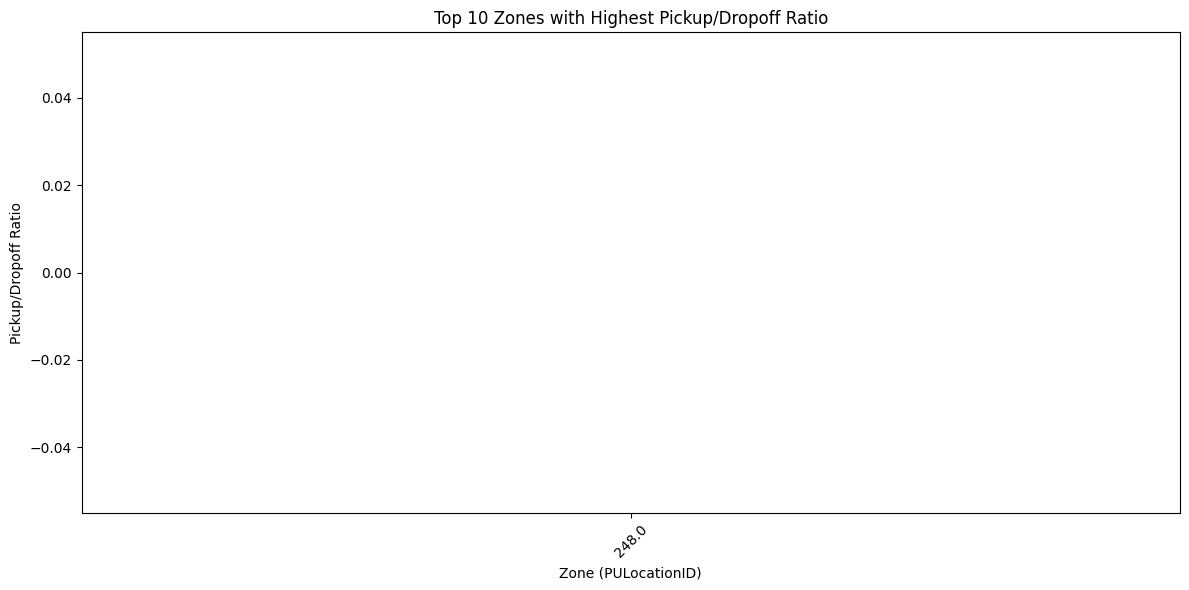

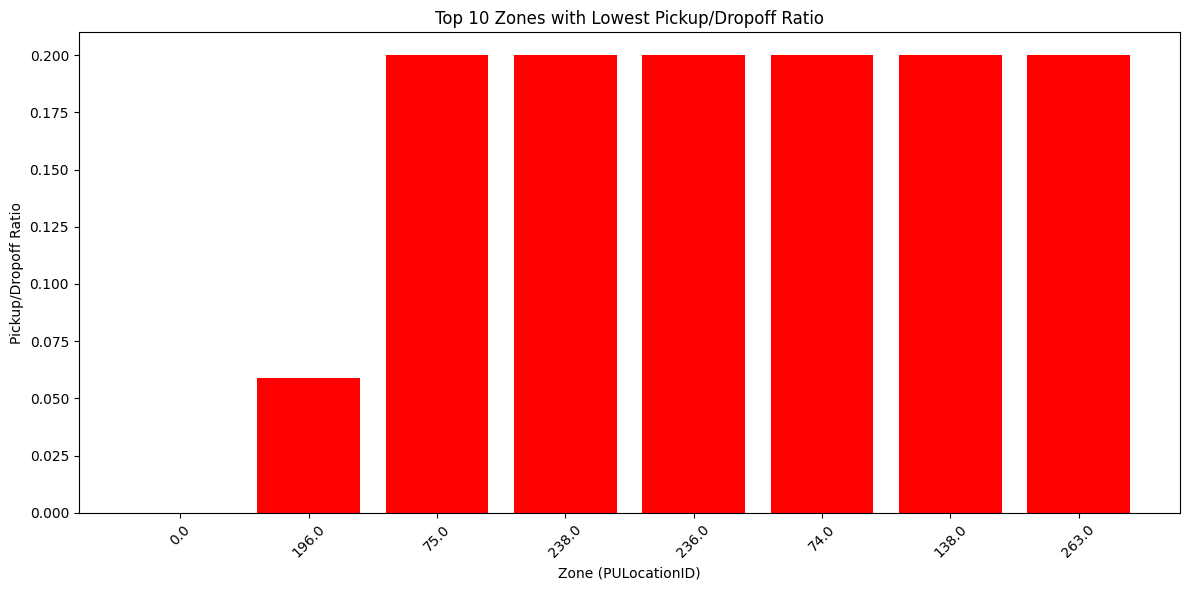

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

zone_counts = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')

zone_counts.fillna(0, inplace=True)

zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count']

top_10_ratio = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratio = zone_counts.sort_values(by='pickup_dropoff_ratio').head(10)

print("Top 10 Zones with Highest Pickup/Dropoff Ratio:")
print(top_10_ratio[['PULocationID', 'pickup_dropoff_ratio']])

print("\nTop 10 Zones with Lowest Pickup/Dropoff Ratio:")
print(bottom_10_ratio[['PULocationID', 'pickup_dropoff_ratio']])

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_10_ratio['PULocationID'].astype(str), top_10_ratio['pickup_dropoff_ratio'], color='green')
plt.title('Top 10 Zones with Highest Pickup/Dropoff Ratio')
plt.xlabel('Zone (PULocationID)')
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(bottom_10_ratio['PULocationID'].astype(str), bottom_10_ratio['pickup_dropoff_ratio'], color='red')
plt.title('Top 10 Zones with Lowest Pickup/Dropoff Ratio')
plt.xlabel('Zone (PULocationID)')
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):
   PULocationID  pickup_count_night
0             4                   1
1             6                   1
2             7                   1
3            11                   1
4            13                   1
5            14                   1
6            24                   1
7            25                   1
8            26                   1
9            27                   1

Top 10 Dropoff Zones during Night Hours (11 PM to 5 AM):
    DOLocationID  dropoff_count_night
51           238                    5
62           263                    5
1             13                    3
15            68                    3
40           170                    3
43           186                    3
16            74                    3
49           236                    3
25           112                    2
27           116                    2


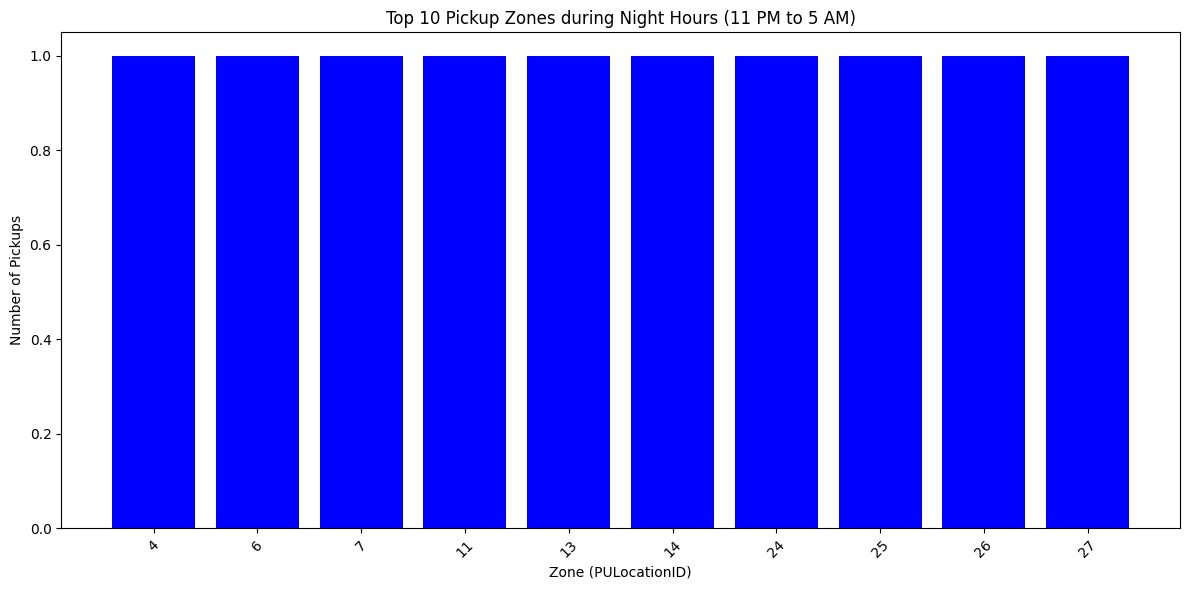

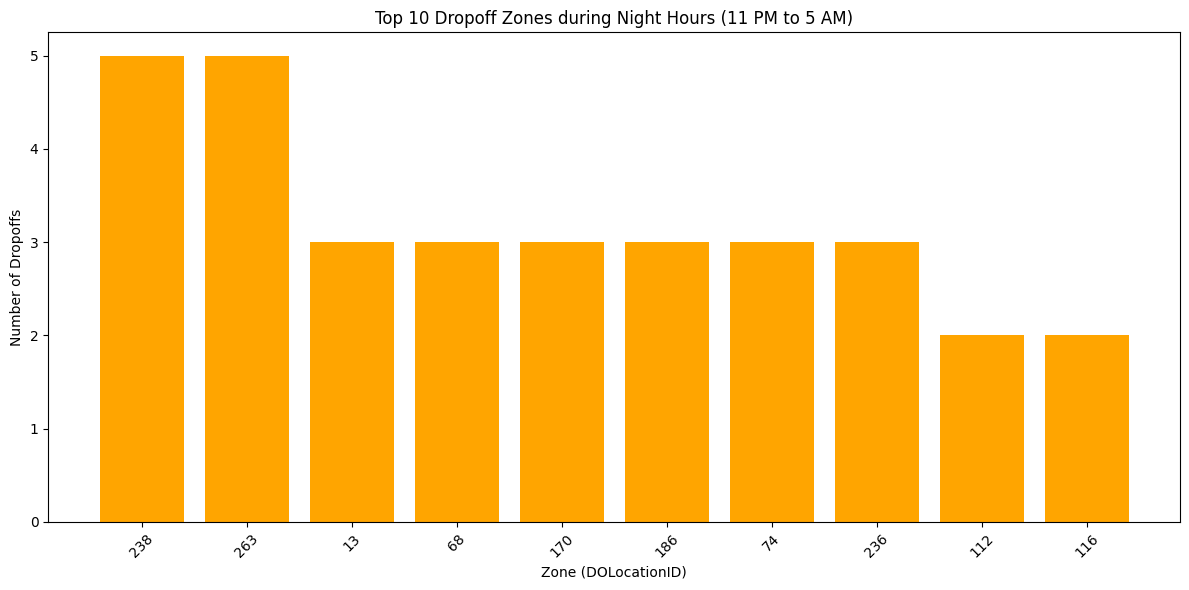

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

night_hours = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5) |
                 (df['dropoff_hour'] >= 23) | (df['dropoff_hour'] <= 5)]


pickup_counts_night = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count_night')
dropoff_counts_night = night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count_night')

top_10_pickup_night = pickup_counts_night.sort_values(by='pickup_count_night', ascending=False).head(10)
top_10_dropoff_night = dropoff_counts_night.sort_values(by='dropoff_count_night', ascending=False).head(10)

print("Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):")
print(top_10_pickup_night)

print("\nTop 10 Dropoff Zones during Night Hours (11 PM to 5 AM):")
print(top_10_dropoff_night)


plt.figure(figsize=(12, 6))
plt.bar(top_10_pickup_night['PULocationID'].astype(str), top_10_pickup_night['pickup_count_night'], color='blue')
plt.title('Top 10 Pickup Zones during Night Hours (11 PM to 5 AM)')
plt.xlabel('Zone (PULocationID)')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(top_10_dropoff_night['DOLocationID'].astype(str), top_10_dropoff_night['dropoff_count_night'], color='orange')
plt.title('Top 10 Dropoff Zones during Night Hours (11 PM to 5 AM)')
plt.xlabel('Zone (DOLocationID)')
plt.ylabel('Number of Dropoffs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

night_hours = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
daytime_hours = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]

night_revenue = night_hours['total_amount'].sum()
daytime_revenue = daytime_hours['total_amount'].sum()

total_revenue = night_revenue + daytime_revenue

night_revenue_share = (night_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share (11 PM to 5 AM): {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share (6 AM to 10 PM): {daytime_revenue_share:.2f}%")


Nighttime Revenue Share (11 PM to 5 AM): -4.13%
Daytime Revenue Share (6 AM to 10 PM): 104.13%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['trip_distance'] > 0]

df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']
df = df[df['passenger_count'] > 0]

average_fare_per_mile_per_passenger = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

print(average_fare_per_mile_per_passenger)



passenger_count
1.0    1.849011
2.0    0.125980
3.0    0.107166
4.0    0.028173
5.0    0.029848
6.0    0.018360
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

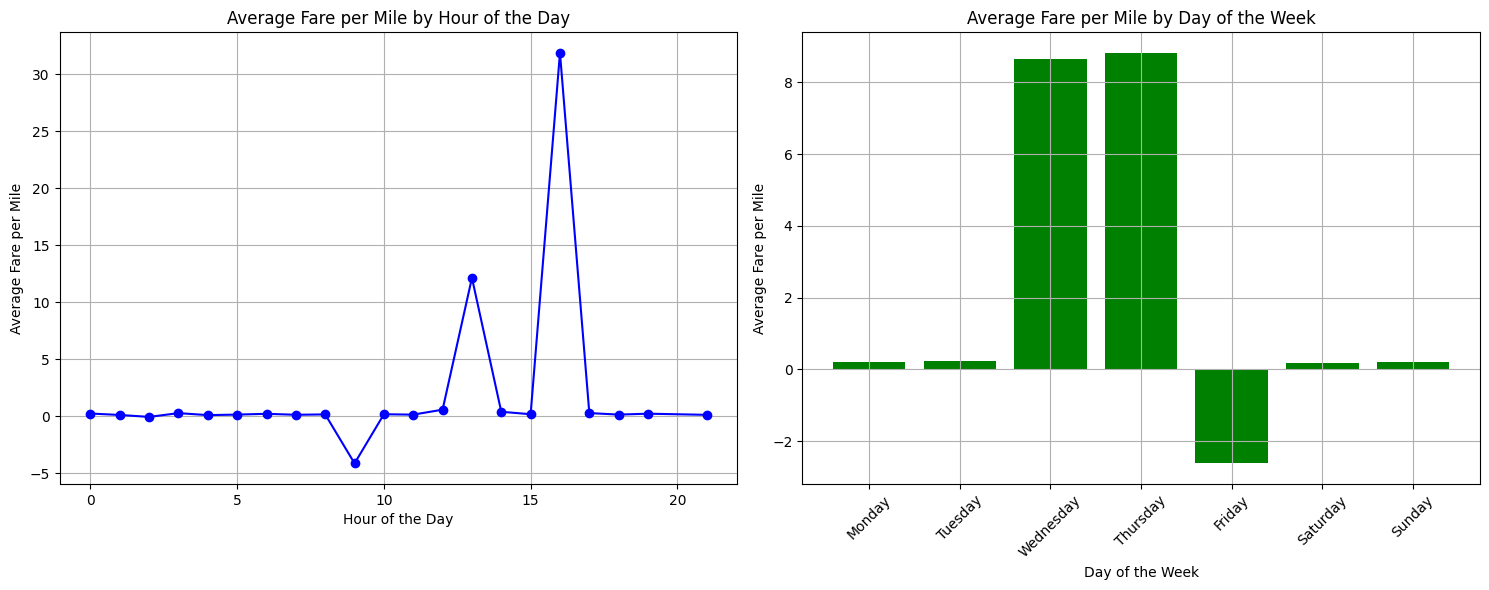

Average Fare per Mile by Hour of the Day:
hour_of_day
0      0.225502
1      0.099329
2     -0.070344
3      0.260498
4      0.085304
5      0.131993
6      0.200989
7      0.115457
8      0.149177
9     -4.148295
10     0.161959
11     0.128584
12     0.563782
13    12.128148
14     0.379676
15     0.163701
16    31.872156
17     0.264587
18     0.131827
19     0.211101
21     0.110223
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Day of the Week:
day_of_week
Monday       0.218877
Tuesday      0.229390
Wednesday    8.641621
Thursday     8.822013
Friday      -2.617931
Saturday     0.186459
Sunday       0.200834
Name: fare_per_mile, dtype: float64


In [ ]:
# Compare the average fare per mile for different days and for different times of the day
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['trip_distance'] > 0]

df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

avg_fare_per_mile_by_hour = df.groupby('hour_of_day')['fare_per_mile'].mean()

avg_fare_per_mile_by_day = df.groupby('day_of_week')['fare_per_mile'].mean()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_fare_per_mile_by_day = avg_fare_per_mile_by_day[days_order]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(avg_fare_per_mile_by_hour.index, avg_fare_per_mile_by_hour.values, marker='o', color='b')
ax[0].set_title('Average Fare per Mile by Hour of the Day')
ax[0].set_xlabel('Hour of the Day')
ax[0].set_ylabel('Average Fare per Mile')
ax[0].grid(True)

ax[1].bar(avg_fare_per_mile_by_day.index, avg_fare_per_mile_by_day.values, color='g')
ax[1].set_title('Average Fare per Mile by Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Average Fare per Mile')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()

print("Average Fare per Mile by Hour of the Day:")
print(avg_fare_per_mile_by_hour)

print("\nAverage Fare per Mile by Day of the Week:")
print(avg_fare_per_mile_by_day)


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

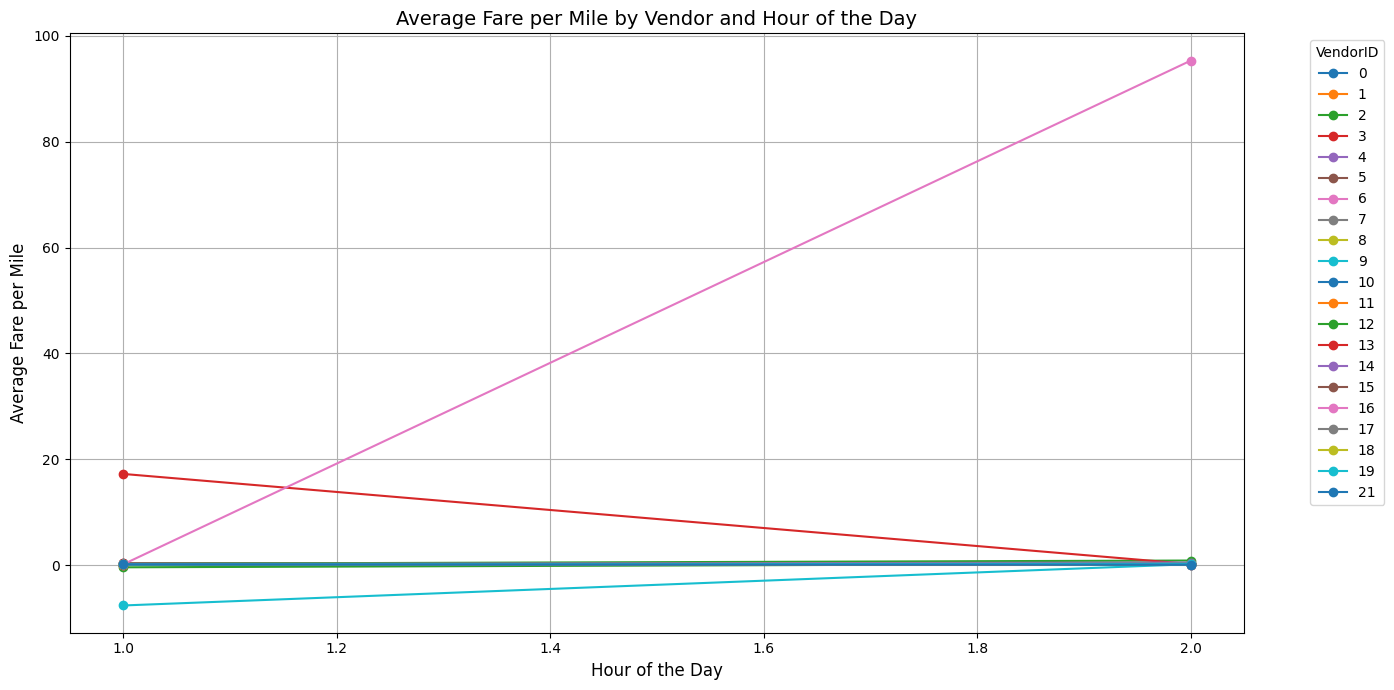

Average Fare per Mile by Vendor and Hour of the Day:
hour_of_day        0         1         2         3         4         5   \
VendorID                                                                  
1            0.359156       NaN -0.406198  0.320613  0.110631  0.092227   
2            0.136400  0.099329  0.265510  0.140268  0.034651  0.211526   

hour_of_day        6         7         8         9   ...        11        12  \
VendorID                                             ...                       
1            0.209768  0.121372  0.119438 -7.617826  ...  0.128584  0.254929   
2            0.139536  0.111020  0.171481  0.188620  ...       NaN  0.872635   

hour_of_day         13        14        15         16        17        18  \
VendorID                                                                    
1            17.238203  0.180021  0.107585   0.143481  0.245233  0.131827   
2             0.204687  0.499470  0.177730  95.329507  0.303293       NaN   

hour_of_day     

In [ ]:
# Compare fare per mile for different vendors
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['trip_distance'] > 0]

df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour

avg_fare_per_mile_by_vendor_hour = df.groupby(['VendorID', 'hour_of_day'])['fare_per_mile'].mean().unstack()

fig, ax = plt.subplots(figsize=(14, 7))

avg_fare_per_mile_by_vendor_hour.plot(ax=ax, marker='o')

ax.set_title('Average Fare per Mile by Vendor and Hour of the Day', fontsize=14)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Average Fare per Mile', fontsize=12)
ax.legend(title='VendorID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

print("Average Fare per Mile by Vendor and Hour of the Day:")
print(avg_fare_per_mile_by_vendor_hour)


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


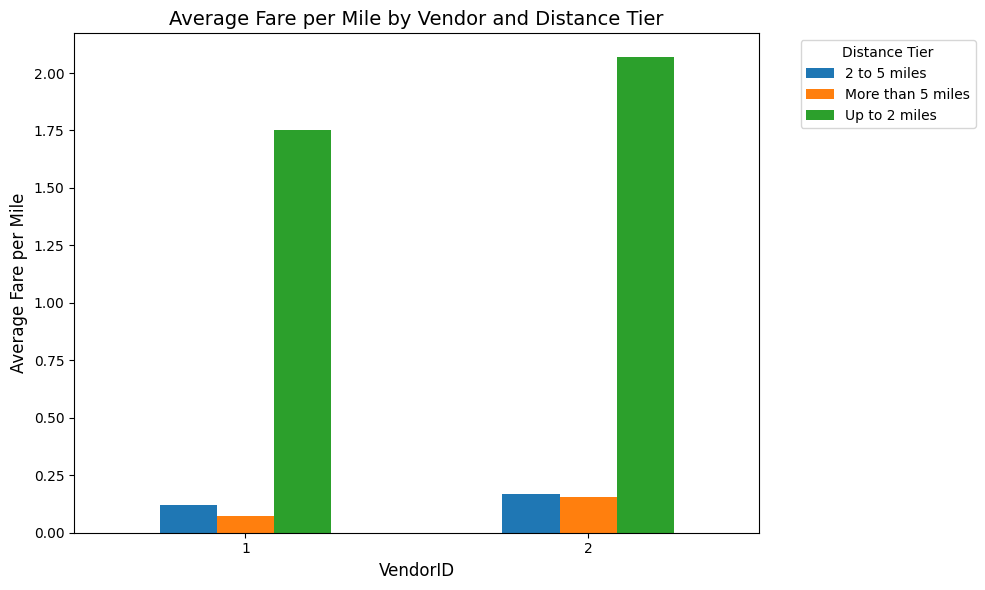

Average Fare per Mile by Vendor and Distance Tier:
distance_tier  2 to 5 miles  More than 5 miles  Up to 2 miles
VendorID                                                     
1                  0.118470           0.072182       1.753693
2                  0.169389           0.156742       2.069117


In [ ]:
# Defining distance tiers
def distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif 2 < distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

df['distance_tier'] = df['trip_distance'].apply(distance_tier)

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

avg_fare_per_mile_by_vendor_tier = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

avg_fare_per_mile_by_vendor_tier.plot(kind='bar', ax=ax)

ax.set_title('Average Fare per Mile by Vendor and Distance Tier', fontsize=14)
ax.set_xlabel('VendorID', fontsize=12)
ax.set_ylabel('Average Fare per Mile', fontsize=12)
ax.set_xticklabels(avg_fare_per_mile_by_vendor_tier.index, rotation=0)
ax.legend(title='Distance Tier', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("Average Fare per Mile by Vendor and Distance Tier:")
print(avg_fare_per_mile_by_vendor_tier)



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

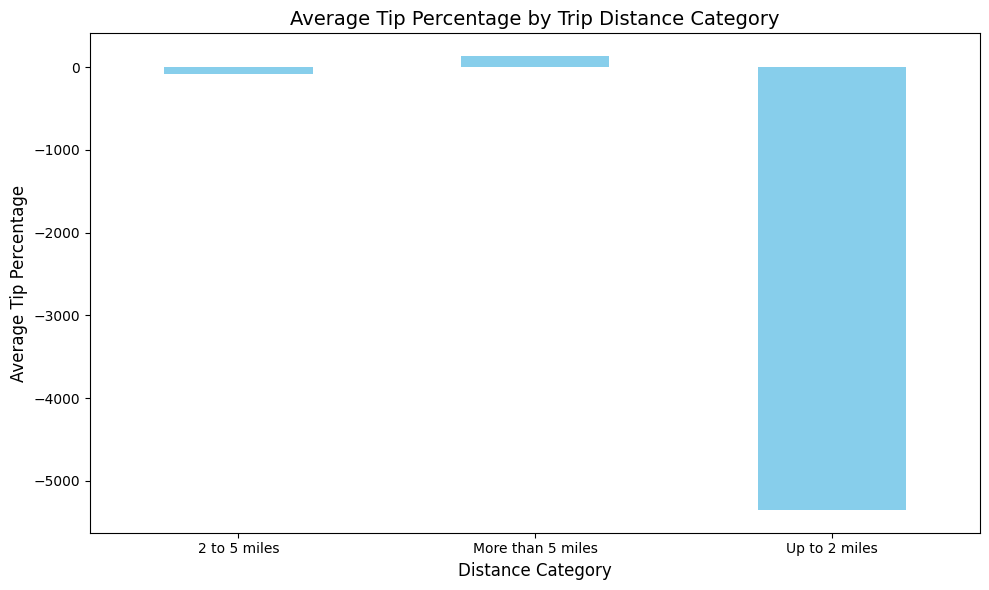

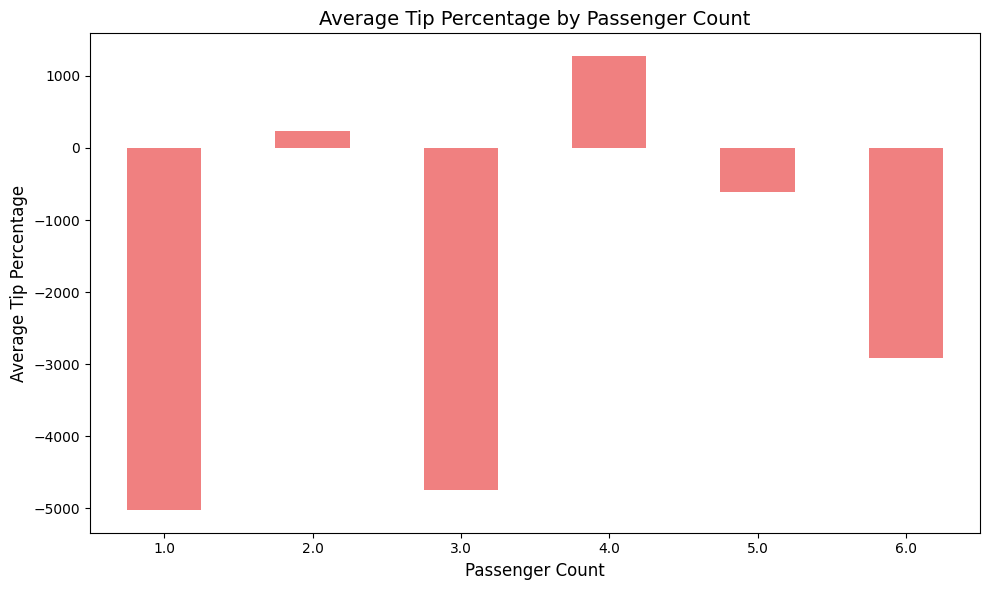

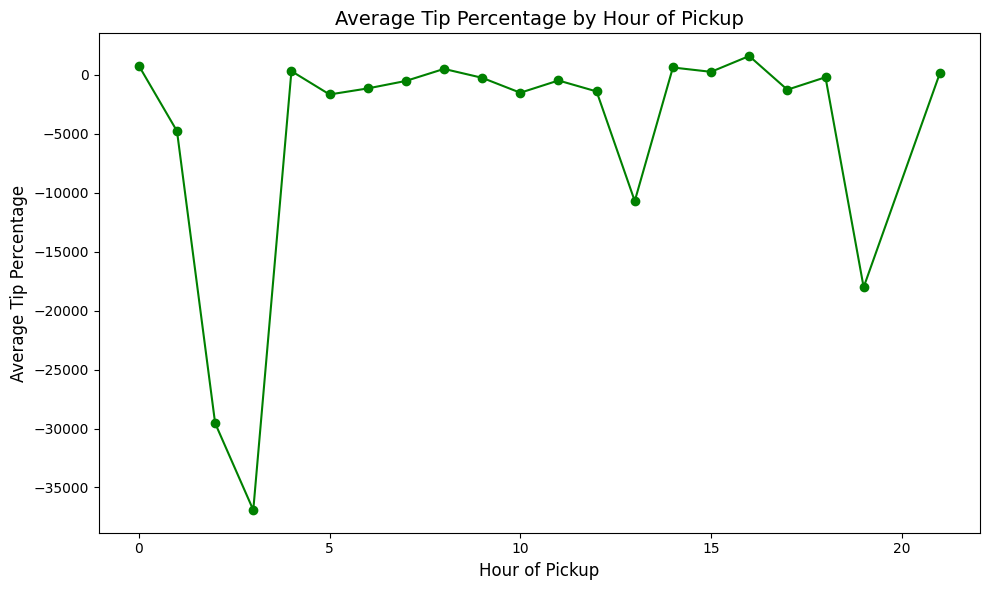

Low tip percentage trips:
    tip_percentage  trip_distance  passenger_count  pickup_hour
49    -1065.190926       0.131734              2.0            1
52   -24779.295122       0.499536              3.0            1
62  -150622.872928       0.022269              1.0            2
64   -24779.295122       0.503915              1.0            2
67    -1053.712292       1.445313              1.0            2


In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100

def distance_category(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif 2 < distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

df['distance_category'] = df['trip_distance'].apply(distance_category)

avg_tip_percentage_by_passenger_count = df.groupby('passenger_count')['tip_percentage'].mean()

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
avg_tip_percentage_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean()

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('distance_category')['tip_percentage'].mean().plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Average Tip Percentage by Trip Distance Category', fontsize=14)
ax.set_xlabel('Distance Category', fontsize=12)
ax.set_ylabel('Average Tip Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
avg_tip_percentage_by_passenger_count.plot(kind='bar', ax=ax, color='lightcoral')
ax.set_title('Average Tip Percentage by Passenger Count', fontsize=14)
ax.set_xlabel('Passenger Count', fontsize=12)
ax.set_ylabel('Average Tip Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
avg_tip_percentage_by_hour.plot(kind='line', ax=ax, color='green', marker='o')
ax.set_title('Average Tip Percentage by Hour of Pickup', fontsize=14)
ax.set_xlabel('Hour of Pickup', fontsize=12)
ax.set_ylabel('Average Tip Percentage', fontsize=12)
plt.tight_layout()
plt.show()

low_tip_percentage = df[df['tip_percentage'] < df['tip_percentage'].quantile(0.25)]
print("Low tip percentage trips:")
print(low_tip_percentage[['tip_percentage', 'trip_distance', 'passenger_count', 'pickup_hour']].head())


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Summary of Low Tip Trips (tip < 10%):
       tip_percentage  trip_distance  passenger_count  pickup_hour  \
count       74.000000      74.000000        74.000000    74.000000   
mean     -8495.351394       1.557766         1.229730     9.891892   
std      27657.496699       1.283415         0.820078     5.456095   
min    -150622.872928       0.006944         1.000000     0.000000   
25%      -1910.677429       0.652787         1.000000     6.000000   
50%       -697.465659       1.223099         1.000000    10.000000   
75%       -270.962643       2.206094         1.000000    13.000000   
max        -87.657754       5.933375         6.000000    21.000000   

       total_amount  
count     74.000000  
mean       0.180742  
std        0.193267  
min       -0.043675  
25%        0.038187  
50%        0.113647  
75%        0.260596  
max        0.818020  

Summary of High Tip Trips (tip > 25%):
       tip_percentage  trip_distance  passenger_count  pickup_hour  \
count       60.000000  

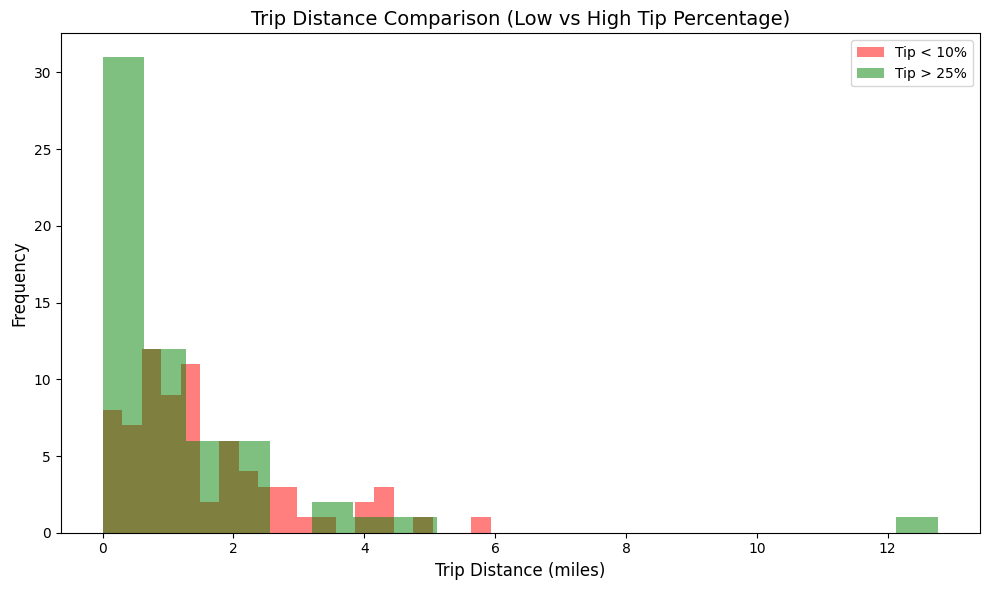

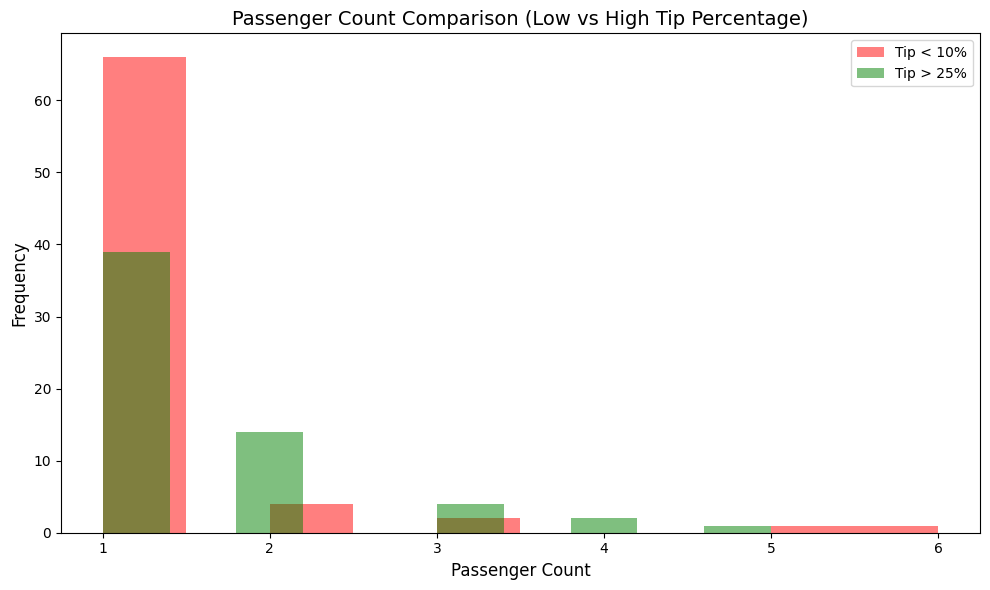

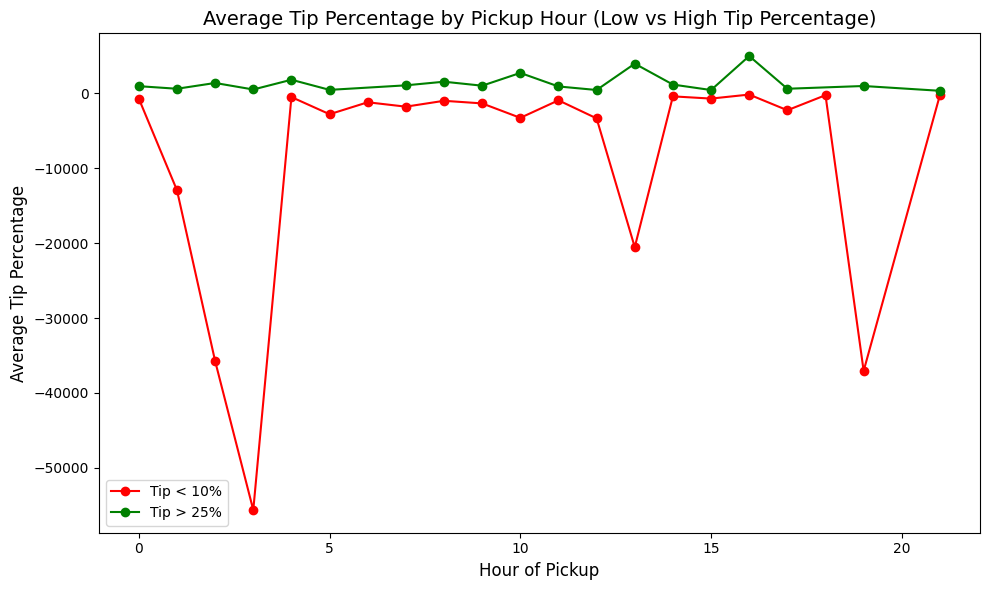

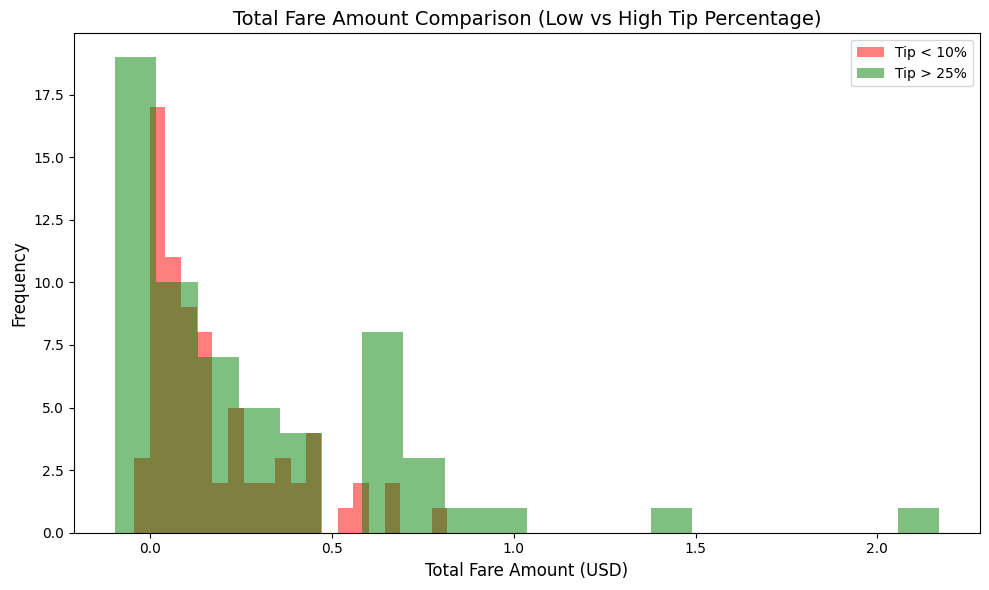

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_trips = df[df['tip_percentage'] < 10]
high_tip_trips = df[df['tip_percentage'] > 25]

low_tip_summary = low_tip_trips[['tip_percentage', 'trip_distance', 'passenger_count', 'pickup_hour', 'total_amount']].describe()
high_tip_summary = high_tip_trips[['tip_percentage', 'trip_distance', 'passenger_count', 'pickup_hour', 'total_amount']].describe()

print("Summary of Low Tip Trips (tip < 10%):")
print(low_tip_summary)
print("\nSummary of High Tip Trips (tip > 25%):")
print(high_tip_summary)


fig, ax = plt.subplots(figsize=(10, 6))
low_tip_trips['trip_distance'].plot(kind='hist', ax=ax, bins=20, alpha=0.5, label='Tip < 10%', color='red')
high_tip_trips['trip_distance'].plot(kind='hist', ax=ax, bins=20, alpha=0.5, label='Tip > 25%', color='green')
ax.set_title('Trip Distance Comparison (Low vs High Tip Percentage)', fontsize=14)
ax.set_xlabel('Trip Distance (miles)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
low_tip_trips['passenger_count'].plot(kind='hist', ax=ax, bins=10, alpha=0.5, label='Tip < 10%', color='red')
high_tip_trips['passenger_count'].plot(kind='hist', ax=ax, bins=10, alpha=0.5, label='Tip > 25%', color='green')
ax.set_title('Passenger Count Comparison (Low vs High Tip Percentage)', fontsize=14)
ax.set_xlabel('Passenger Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
low_tip_trips.groupby('pickup_hour')['tip_percentage'].mean().plot(kind='line', ax=ax, label='Tip < 10%', color='red', marker='o')
high_tip_trips.groupby('pickup_hour')['tip_percentage'].mean().plot(kind='line', ax=ax, label='Tip > 25%', color='green', marker='o')
ax.set_title('Average Tip Percentage by Pickup Hour (Low vs High Tip Percentage)', fontsize=14)
ax.set_xlabel('Hour of Pickup', fontsize=12)
ax.set_ylabel('Average Tip Percentage', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
low_tip_trips['total_amount'].plot(kind='hist', ax=ax, bins=20, alpha=0.5, label='Tip < 10%', color='red')
high_tip_trips['total_amount'].plot(kind='hist', ax=ax, bins=20, alpha=0.5, label='Tip > 25%', color='green')
ax.set_title('Total Fare Amount Comparison (Low vs High Tip Percentage)', fontsize=14)
ax.set_xlabel('Total Fare Amount (USD)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

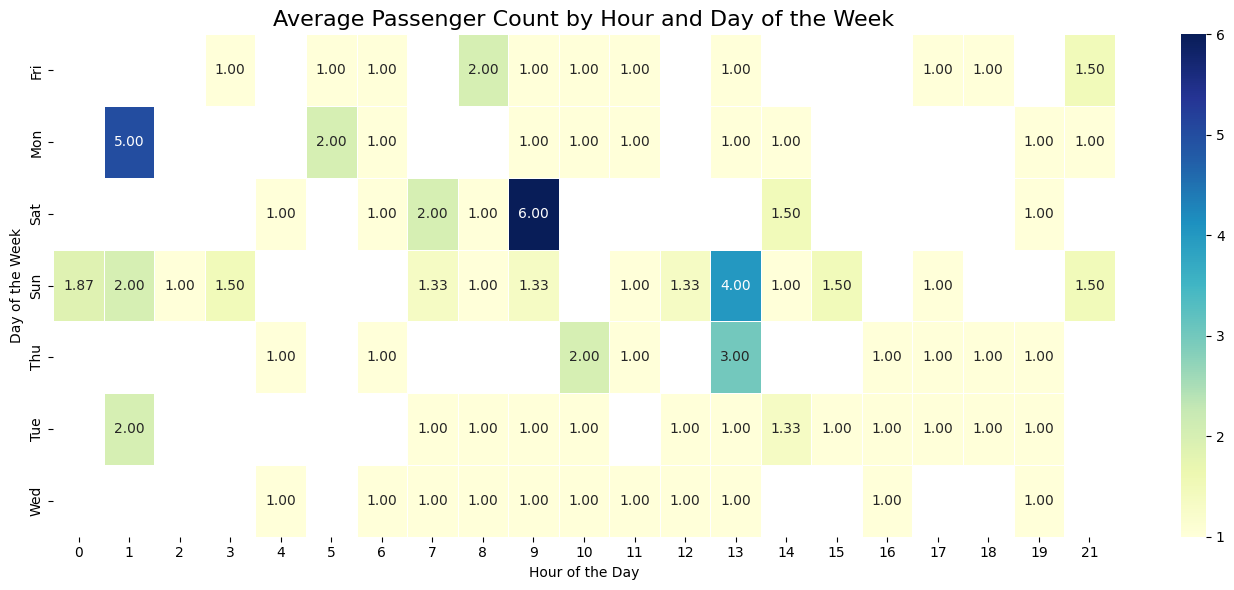

In [ ]:
# See how passenger count varies across hours and days

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

weekday_map = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['pickup_day'] = df['pickup_dayofweek'].map(weekday_map)

passenger_hour_day = df.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(14, 6))
sns.heatmap(passenger_hour_day, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

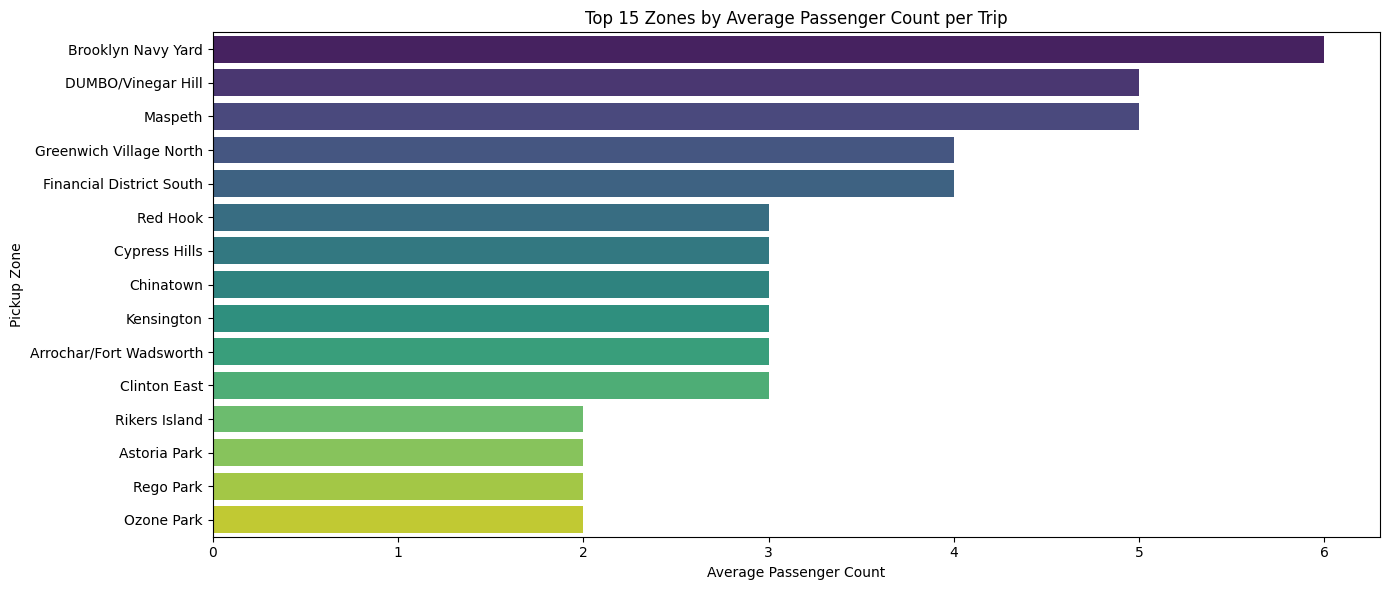

In [ ]:
# How does passenger count vary across zones
zone_passenger_avg = df.groupby('pickup_zone')['passenger_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=zone_passenger_avg.head(15).values, y=zone_passenger_avg.head(15).index, palette='viridis')
plt.title('Top 15 Zones by Average Passenger Count per Trip')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_count = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_count.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)


zones_with_trips = zones_with_trips.merge(
    avg_passenger_count,
    how='left',
    left_on='LocationID',
    right_on='PULocationID'
)



In [ ]:
# Total number of trips
total_trips = len(df)

# Calculate counts and percentages for each surcharge
surcharge_stats = {
    'extra': (df['extra'] > 0).sum(),
    'mta_tax': (df['mta_tax'] > 0).sum(),
    'congestion_surcharge': (df['congestion_surcharge'] > 0).sum(),
    'airport_fee': (df['airport_fee'] > 0).sum(),
    'improvement_surcharge': (df['improvement_surcharge'] > 0).sum()
}

# Convert to DataFrame
surcharge_df = pd.DataFrame.from_dict(surcharge_stats, orient='index', columns=['Applied_Trips'])
surcharge_df['Percentage (%)'] = (surcharge_df['Applied_Trips'] / total_trips * 100).round(2)

surcharge_df


,Applied_Trips,Percentage (%)
extra,17,12.69
mta_tax,128,95.52
congestion_surcharge,45,33.58
airport_fee,7,5.22
improvement_surcharge,134,100.00


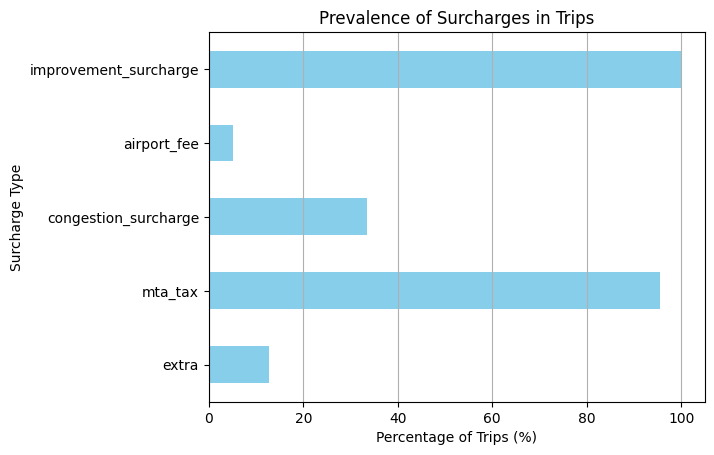

In [ ]:
import matplotlib.pyplot as plt

surcharge_df['Percentage (%)'].plot(kind='barh', color='skyblue')
plt.title('Prevalence of Surcharges in Trips')
plt.xlabel('Percentage of Trips (%)')
plt.ylabel('Surcharge Type')
plt.grid(axis='x')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

pickup_zone
Inwood Hill Park             100.0
LaGuardia Airport            100.0
City Island                  100.0
Clinton East                 100.0
Bushwick North               100.0
West Chelsea/Hudson Yards    100.0
Sunnyside                    100.0
South Jamaica                100.0
SoHo                         100.0
West Village                 100.0
Name: extra, dtype: float64
pickup_hour
12    50.000000
0     46.666667
4     33.333333
19    33.333333
3     33.333333
21    20.000000
6     12.500000
11    11.111111
2      0.000000
1      0.000000
7      0.000000
8      0.000000
5      0.000000
9      0.000000
10     0.000000
13     0.000000
14     0.000000
16     0.000000
15     0.000000
18     0.000000
17     0.000000
Name: extra, dtype: float64


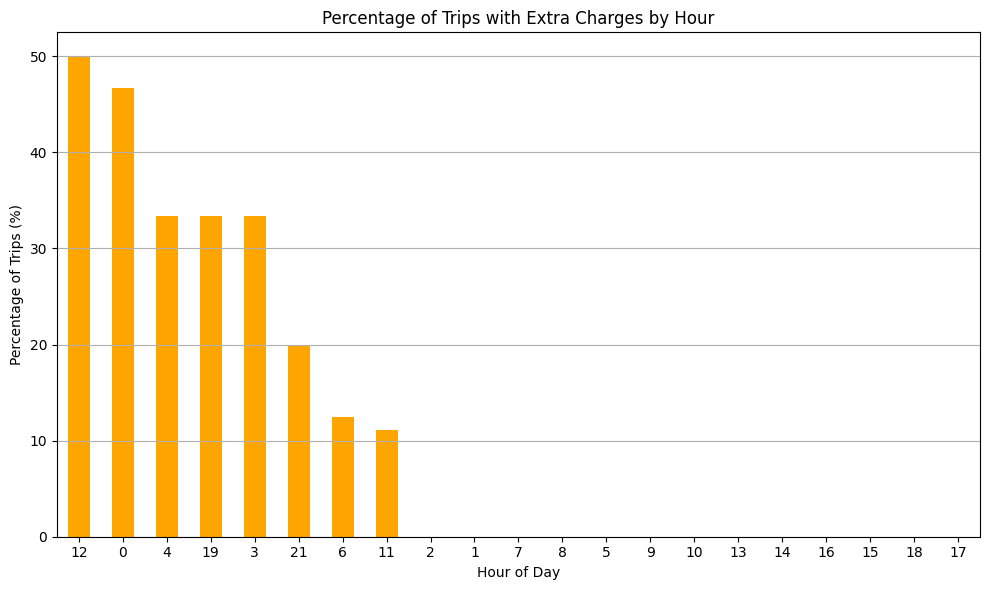

In [ ]:
# How often is each surcharge applied?
pickup_zone_surcharge = df.groupby('pickup_zone')['extra'].apply(lambda x: (x > 0).mean()).sort_values(ascending=False) * 100
print(pickup_zone_surcharge.head(10))

hourly_surcharge = df.groupby('pickup_hour')['extra'].apply(lambda x: (x > 0).mean()).sort_values(ascending=False) * 100
print(hourly_surcharge)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
hourly_surcharge.plot(kind='bar', color='orange')
plt.title('Percentage of Trips with Extra Charges by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Trips (%)')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
#1. Time-Based Dispatching
Deploy more cabs during peak hours (e.g., 12 AM–1 AM, weekend evenings).
Scale down fleet in early morning non-peak hours (e.g., 3–5 AM weekdays).
2. Location-Aware Routing
Prioritize dispatch to high-demand zones like:
LaGuardia Airport
Midtown Center
West Chelsea
Use real-time data to avoid slow zones (e.g., congested Manhattan zones during rush hour).
3. Dynamic Rerouting
Enable GPS-based rerouting during:
Traffic jams
Construction
Special events
4. Pooling & Ride-Share Zones
Encourage ride-sharing in zones with frequent solo rides but high demand.
Set up pickup pooling points to reduce empty return trips.
5. Demand Forecasting
Use hourly and daily trends to predict demand spikes (e.g., Friday evenings, post-sport events).
Pre-position taxis accordingly for proactive dispatch.
6. Incentives & Surcharges
Offer driver incentives for night shifts and remote locations.
Apply surcharges intelligently in zones where demand > supply.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# To optimize cab availability, cabs should be strategically positioned based on demand patterns. Airports and Midtown Manhattan require a steady fleet throughout the day, especially during weekdays. Nightlife and entertainment zones see high demand during late-night weekend hours, so more cabs should be deployed then. Residential areas need higher availability in the early mornings on weekdays for commuters. Rotating some cabs through low-demand zones during off-peak hours can ensure balanced coverage and minimize idle time.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# To optimize revenue while staying competitive, the pricing strategy should be adjusted based on demand patterns, trip distance, and time of day.
Surge pricing during peak hours (like rush hours, weekends, or late-night hours) can help capture high-demand, high-value trips, especially in busy areas like airports and Midtown Manhattan.
For longer trips (over 5 miles), offering a slight discount per mile could attract more customers, while shorter trips (under 2 miles) could have a small premium for convenience.
Additionally, offering dynamic pricing based on real-time demand and offering loyalty discounts during low-demand times can help maintain customer satisfaction while maximizing revenue.